In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [2]:
# First specify the config path
root_path = '/home/swagnercarena/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path_nn1 = root_path + 'validation_results/nn1_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_samps/


In [3]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.029685296525391407 0.009915734184322324 0.013249780231964176
external_shear_g2 0.023828398371851047 0.008967146081237715 0.0136685882757045
lens_mass_center_x 0.01320662646938538 0.0052406829591860465 0.010833664047110924
lens_mass_center_y 0.015910868686675624 0.005016000127994404 0.011019176676434952
lens_mass_e1 0.03970876965240952 0.017107286800240446 0.024937846732633363
lens_mass_e2 0.035172055420760046 0.015479371720429624 0.025208101170551146
lens_mass_gamma 0.06428803107612277 0.029289497945470977 0.04420256971913178
lens_mass_theta_E_log 0.020117902771664364 0.005838311838908483 0.010008744251072163


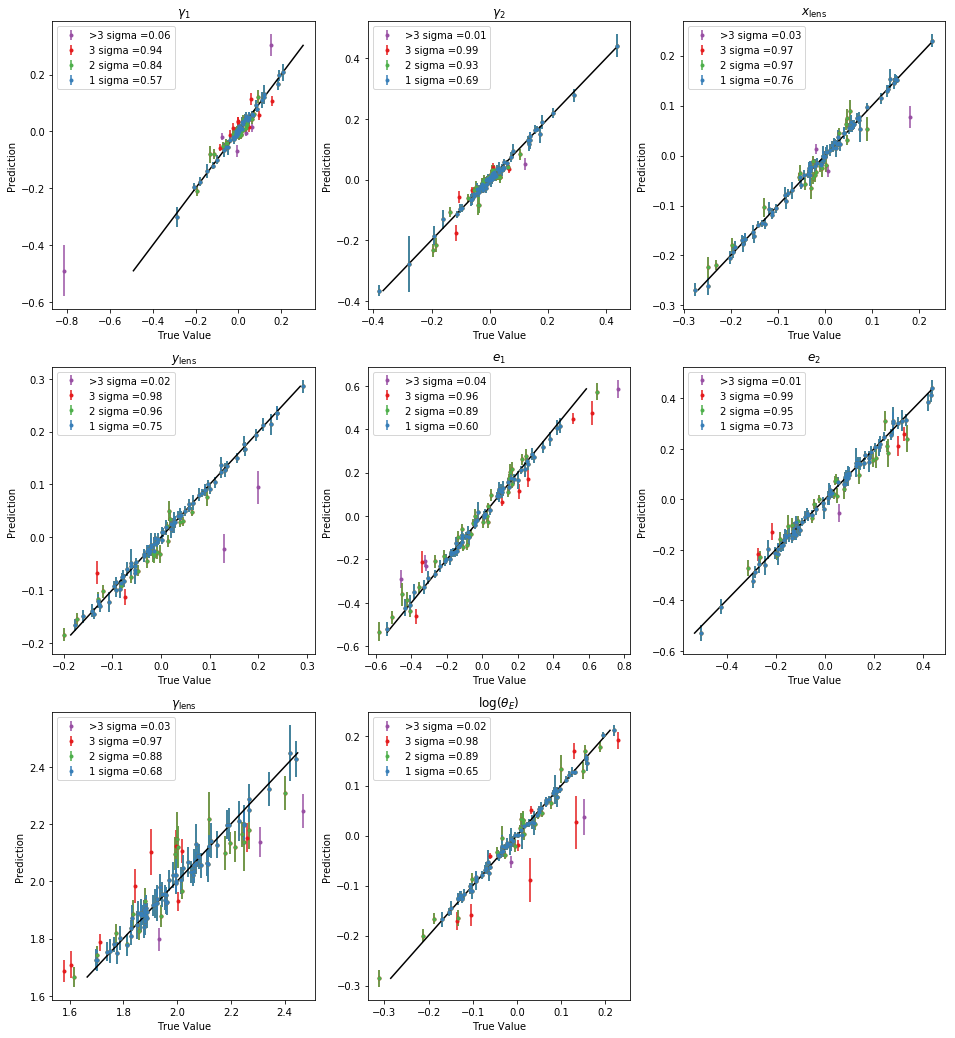

In [4]:
num_lenses = 100
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

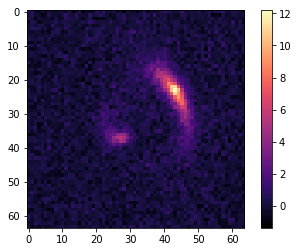

external_shear_g1 0.065538995
external_shear_g2 0.12208252
lens_mass_center_x -0.052397106
lens_mass_center_y 0.122455396
lens_mass_e1 0.02510926
lens_mass_e2 0.057928864
lens_mass_gamma 2.1152308
lens_mass_theta_E_log -0.101429336


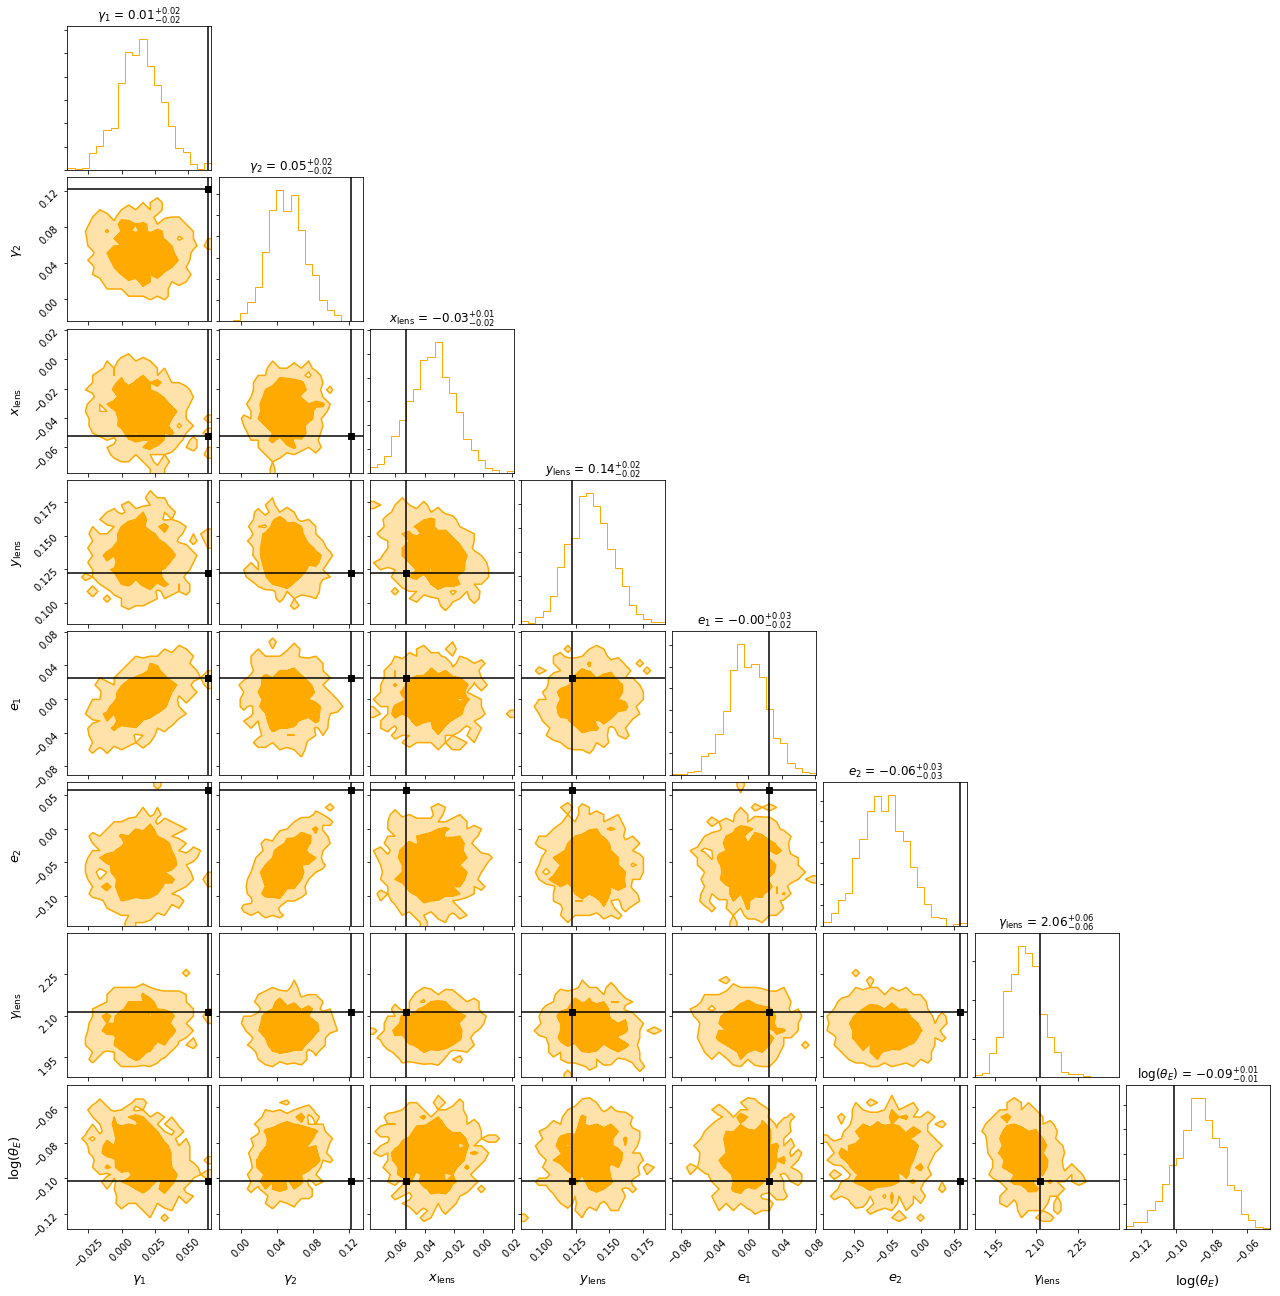

In [5]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

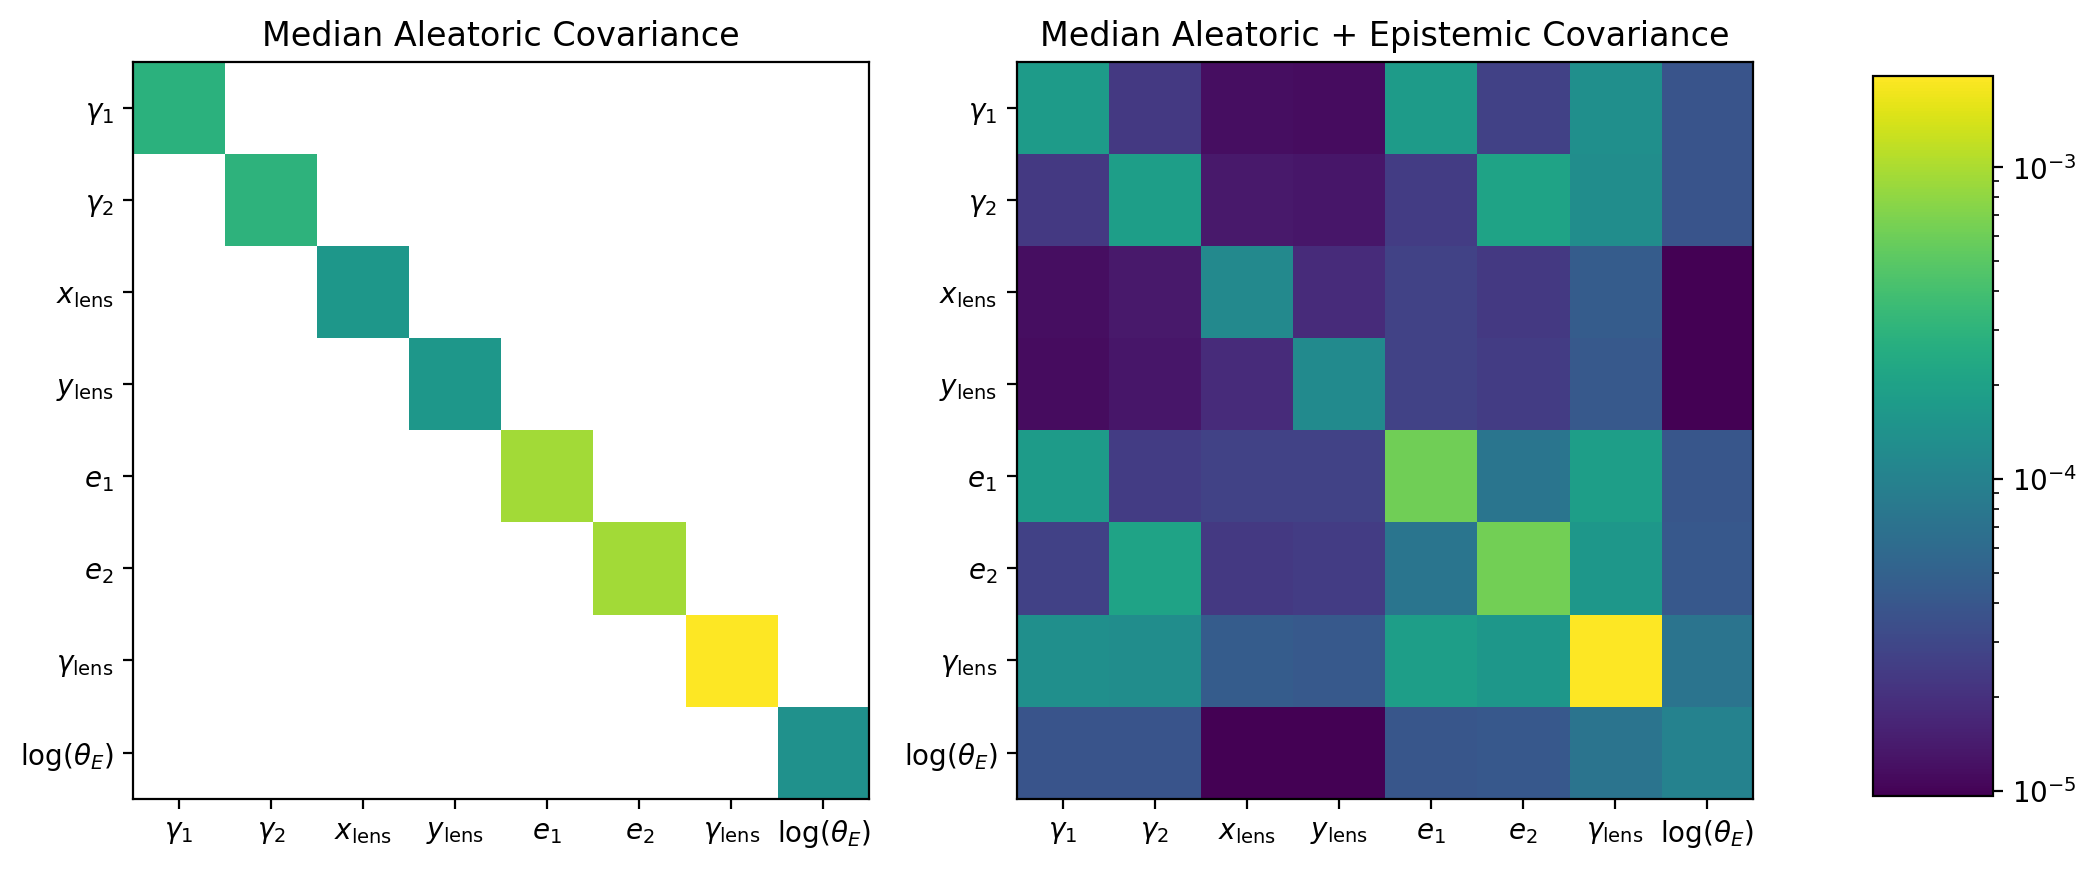

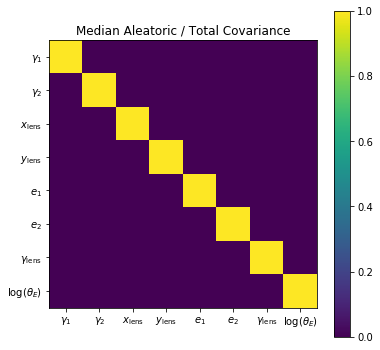

In [6]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

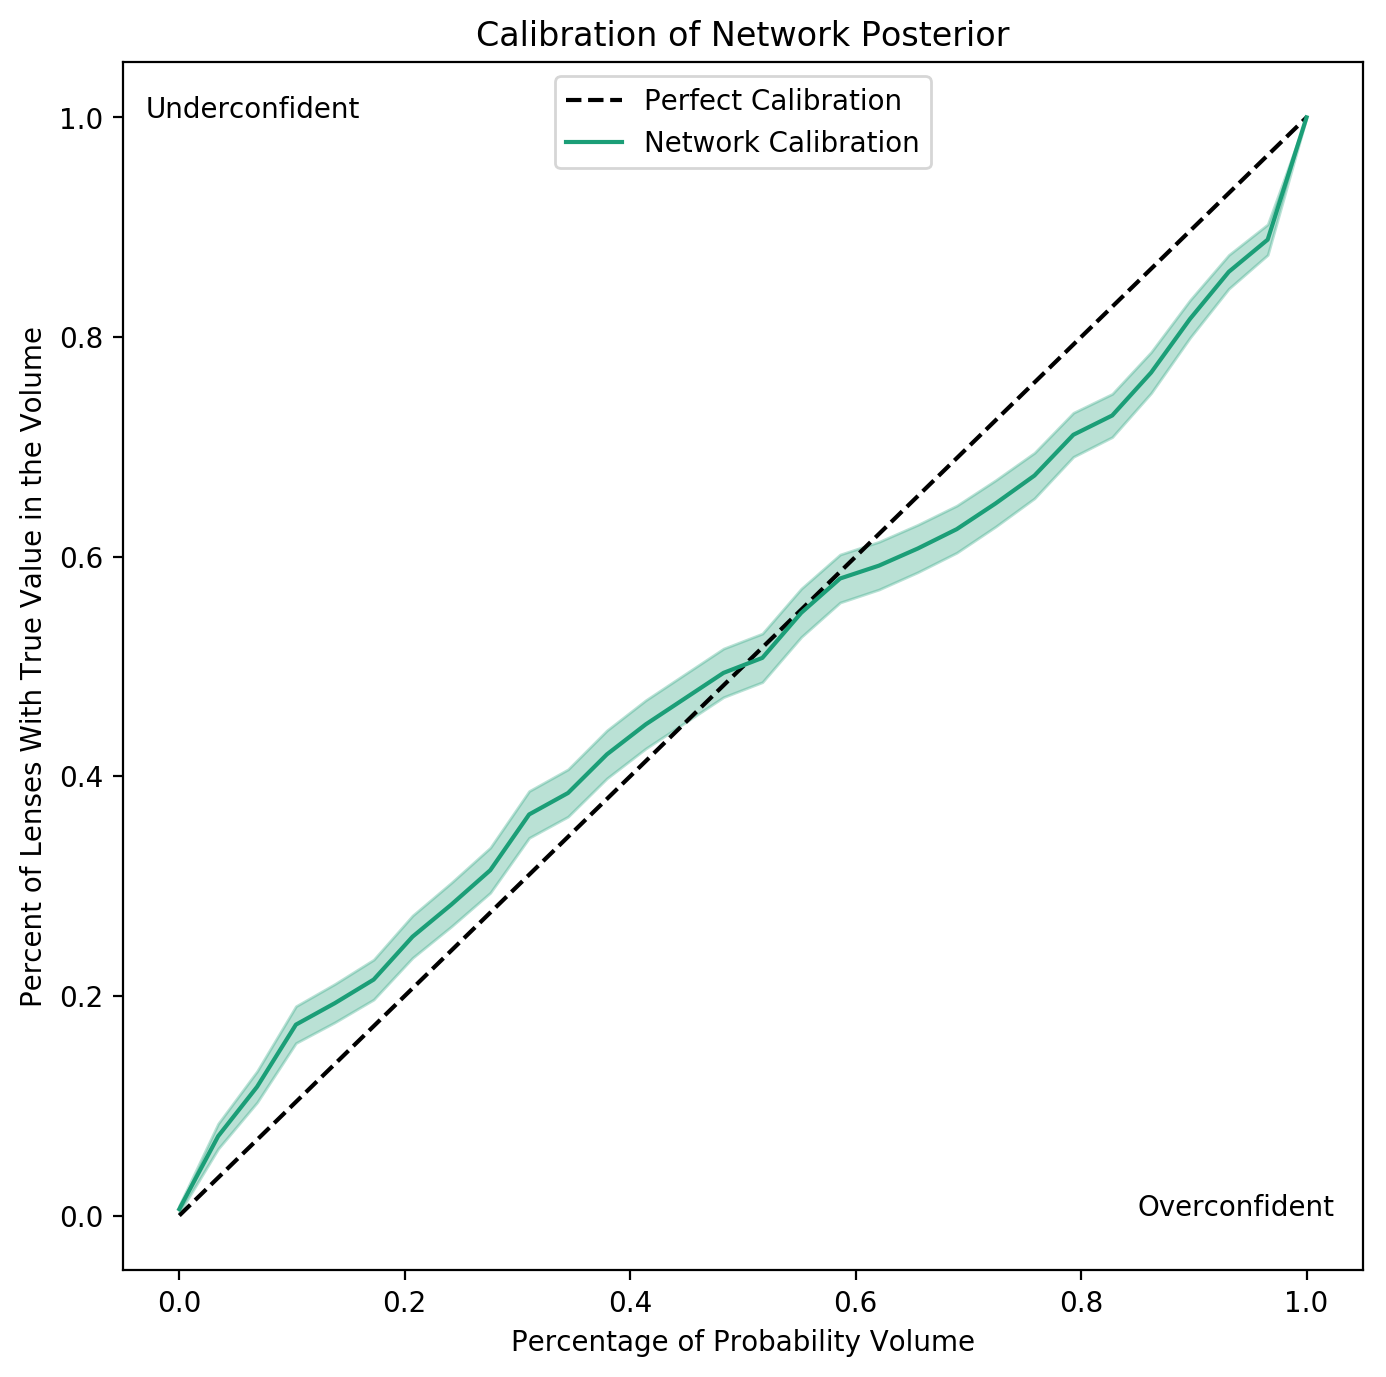

In [7]:
color_map = ['#000000','#1b9e77']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Diagonal High Regularizer

In [8]:
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_hr = root_path + 'validation_results/nn1_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_hr_samps/


In [9]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.035661824221048855 0.011892311708054604 0.020379618011133395
external_shear_g2 0.027472835470802877 0.011966549456453191 0.02163566795183776
lens_mass_center_x 0.015793141468239767 0.006646256227759021 0.018992840432381752
lens_mass_center_y 0.019387130022869577 0.007043183897824639 0.019417984633370432
lens_mass_e1 0.05039776511640123 0.020846990883911433 0.04158198851562703
lens_mass_e2 0.04348197531413065 0.018449318300850698 0.04230161459813819
lens_mass_gamma 0.07431293496430745 0.03872191499485589 0.07270178358524201
lens_mass_theta_E_log 0.023903734351352058 0.0072866490238251945 0.016158901290527165


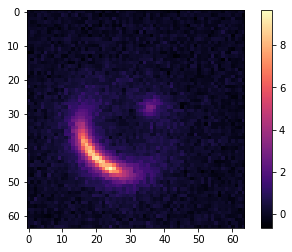

external_shear_g1 0.036515232
external_shear_g2 -0.021246277
lens_mass_center_x -0.004282824
lens_mass_center_y 0.038373698
lens_mass_e1 0.05516405
lens_mass_e2 -0.3423697
lens_mass_gamma 2.045126
lens_mass_theta_E_log -0.025630727


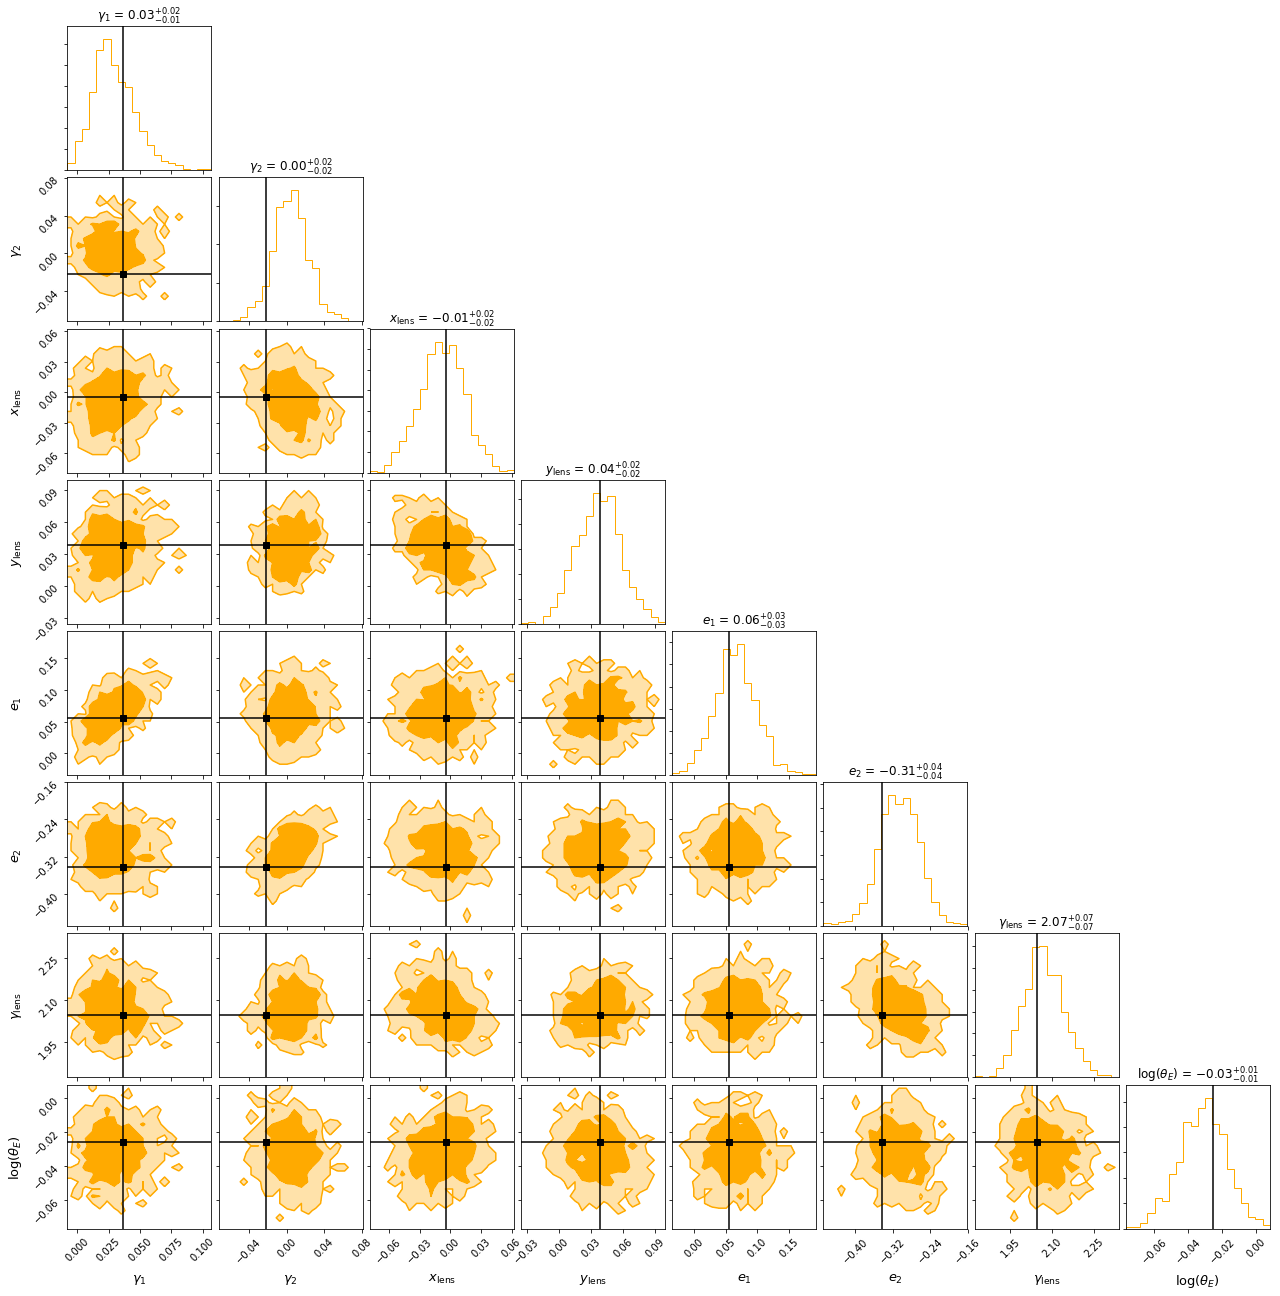

In [10]:
image_index = 8
bnn_infer.plot_posterior_contours(image_index)

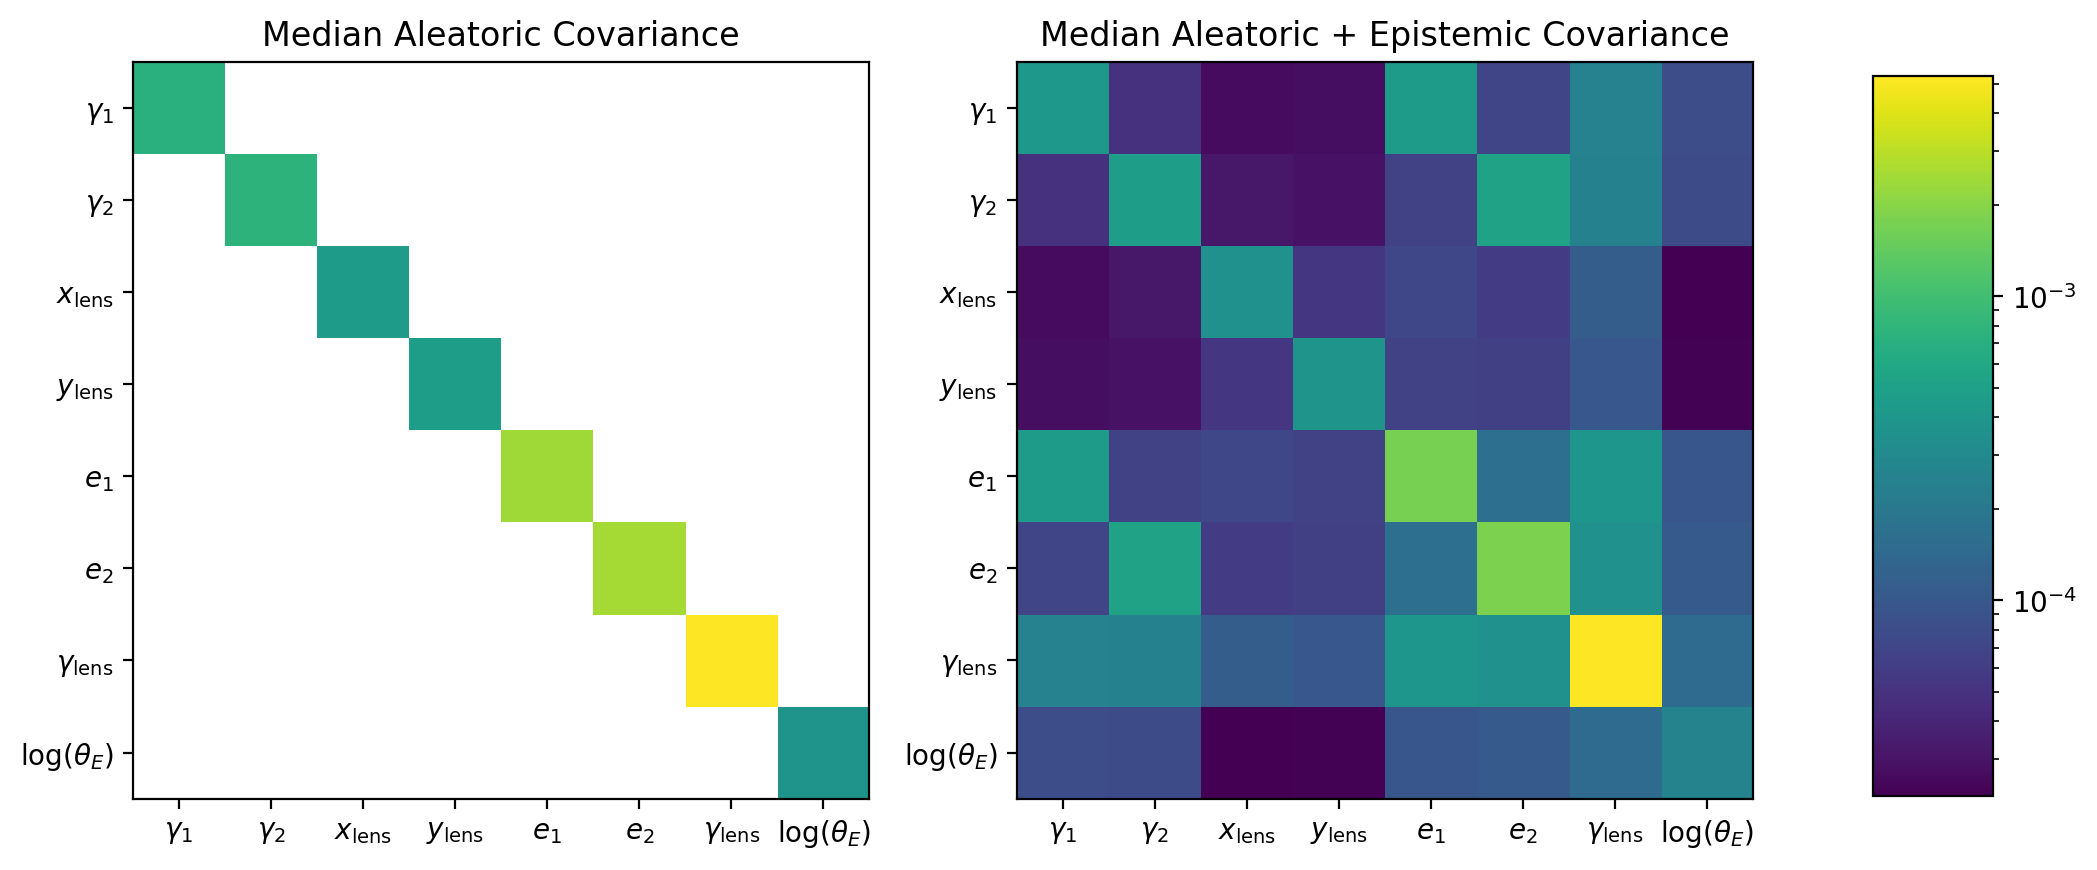

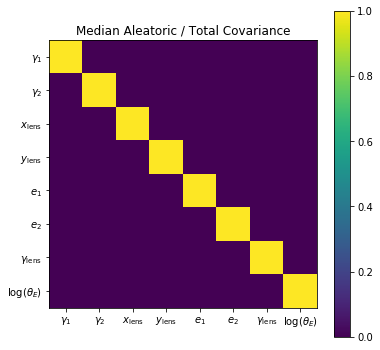

In [11]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Diagonal Low Regularizer

In [12]:
config_path = root_path + 'configs/nn1_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn1_lr = root_path + 'validation_results/nn1_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn1_lr)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_lr_samps/


In [13]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.03030967009790327 0.008657616677598203 0.010314056767578308
external_shear_g2 0.023476462681012732 0.009441239524177882 0.010690496614924725
lens_mass_center_x 0.013444267925830606 0.004932491811490929 0.008266597003507731
lens_mass_center_y 0.015442236398715873 0.0046870523900848435 0.00833017976624998
lens_mass_e1 0.035517023911041334 0.015407486276637315 0.01933381278277971
lens_mass_e2 0.03504647198838157 0.015115731928914293 0.01951360635663181
lens_mass_gamma 0.05546860421259447 0.02778614393432144 0.03442864891299997
lens_mass_theta_E_log 0.01954915486839618 0.005786443825989748 0.007704698298270596


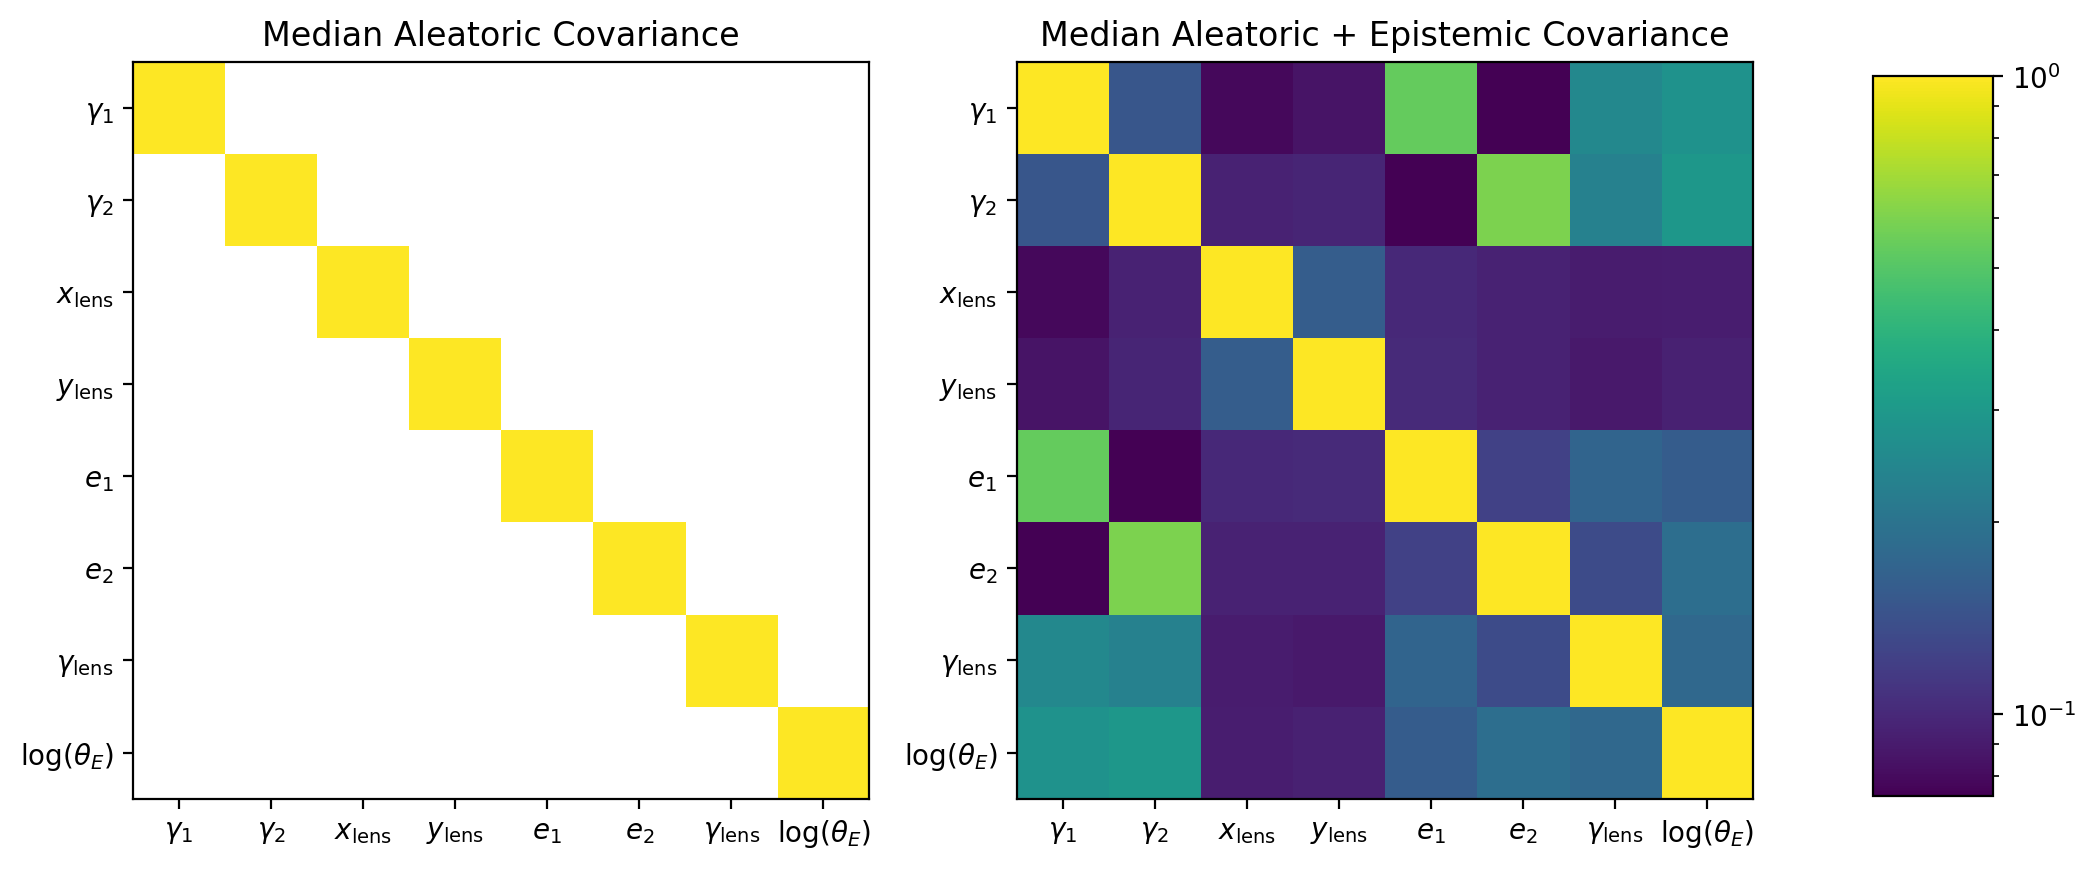

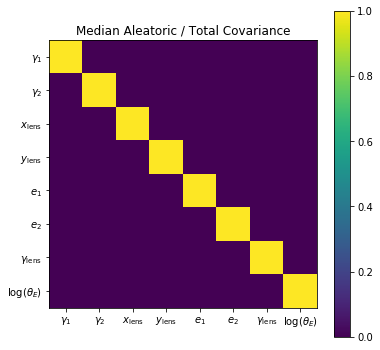

In [14]:
bnn_infer.comp_al_ep_unc(norm_diagonal=True)

## Comparison of Diagonals

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_lr_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_hr_samps/


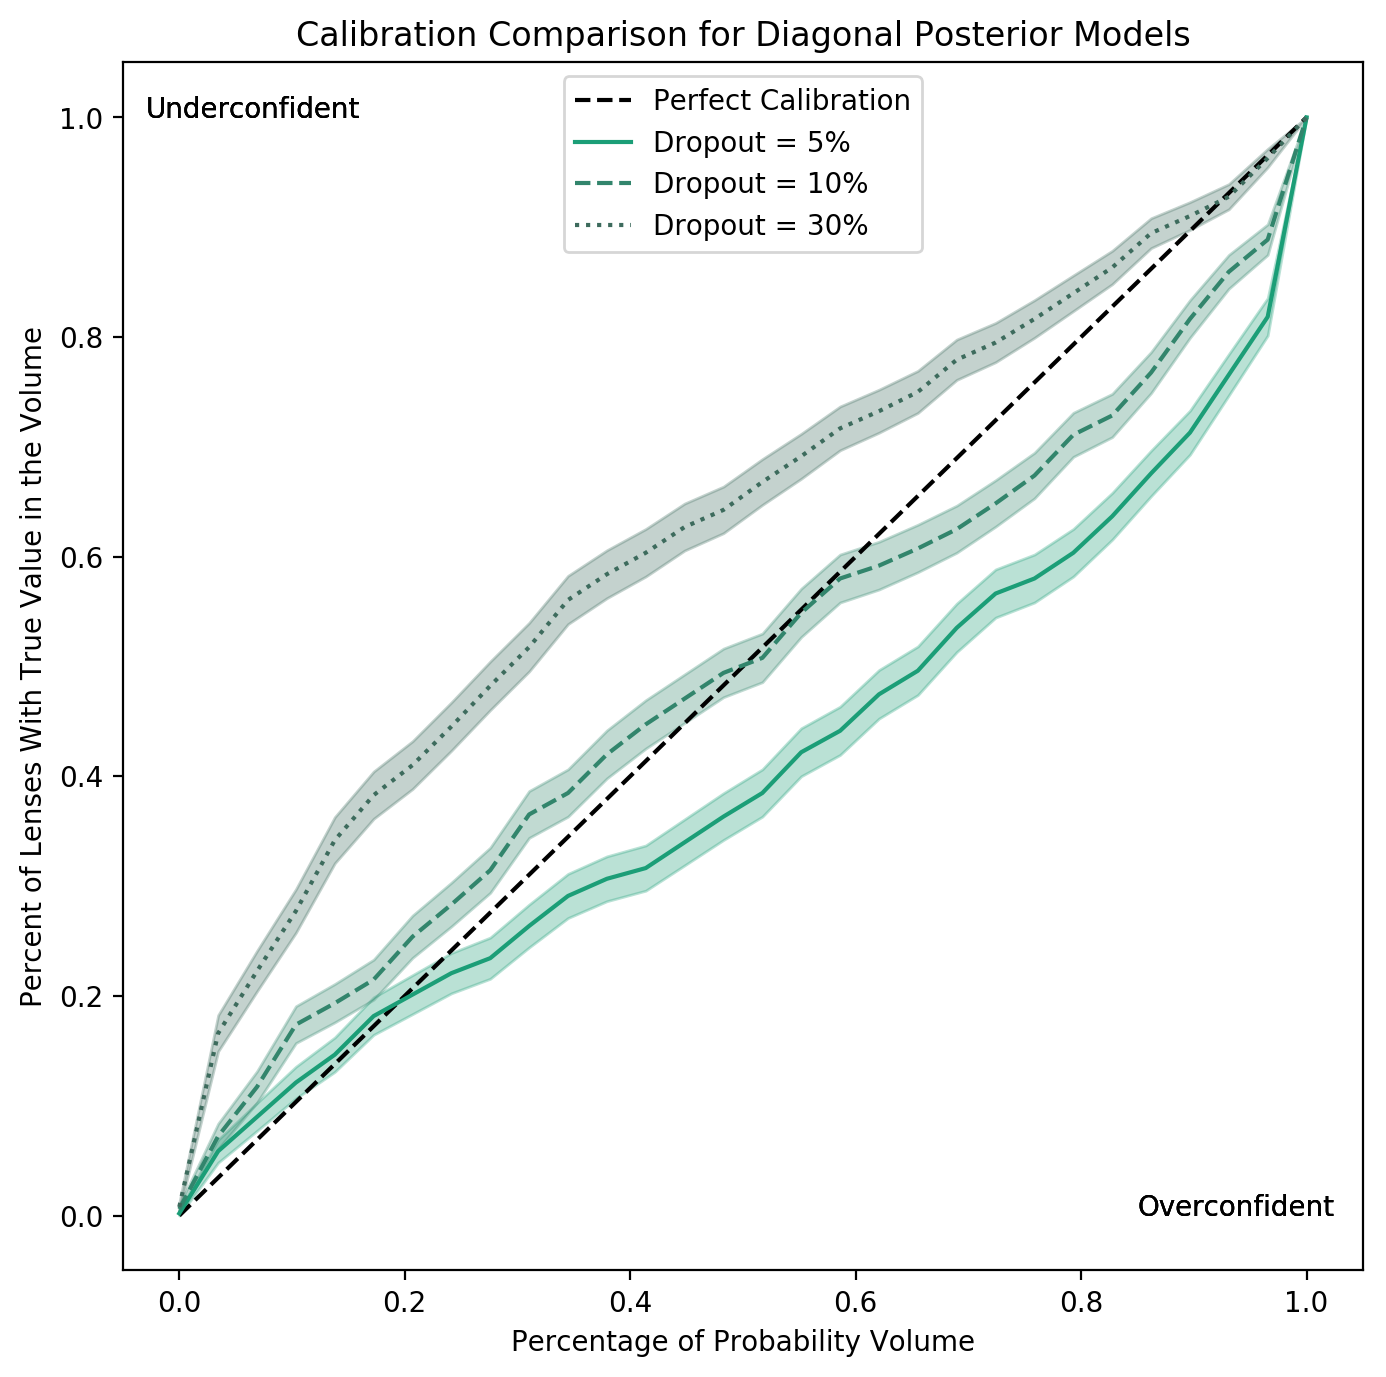

In [15]:
# color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
color_map = ['#000000','#1b9e77','#32856c','#3d6b5d']
ls_list =['-','--',':']

# NN1_LR
config_path = root_path + 'configs/nn1_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_lr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False,ls=ls_list[0])

# NN1
config_path = root_path + 'configs/nn1.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                ls=ls_list[1])

# NN1_HR
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'Dropout = 5%',r'Dropout = 10%',
                                       r'Dropout = 30%'],
                                 title='Calibration Comparison for Diagonal Posterior Models',
                                ls=ls_list[2])

## Full Posterior

In [16]:
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2 = root_path + 'validation_results/nn2_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_samps/


In [17]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.04820575859335224 0.007891111702358327 0.013797415479908145
external_shear_g2 0.019790150930545362 0.007822884127239036 0.01411945943267769
lens_mass_center_x 0.012865608158978801 0.004875856079109789 0.008948333107004366
lens_mass_center_y 0.015428107639247358 0.004669329551962316 0.008995855911509316
lens_mass_e1 0.03967097589363339 0.014523552676682518 0.02355530199050546
lens_mass_e2 0.033446039594663655 0.012849904951497862 0.023719422389739824
lens_mass_gamma 0.0565099919723852 0.027557797788003047 0.04769774775539184
lens_mass_theta_E_log 0.021988791616513723 0.005049311103020749 0.009127071992745532


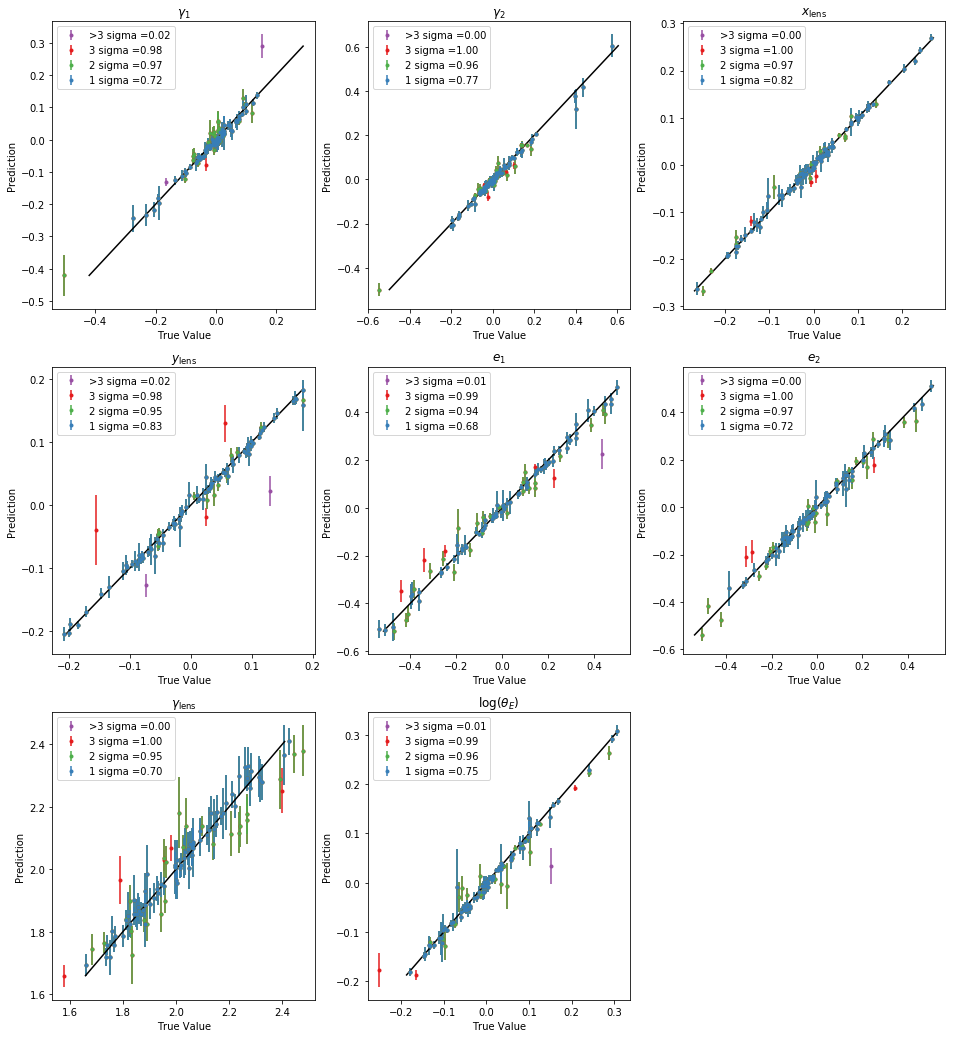

In [18]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

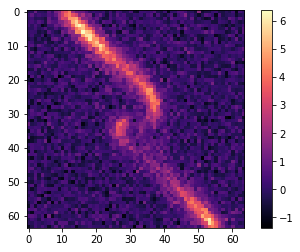

external_shear_g1 -0.2307891
external_shear_g2 0.5742396
lens_mass_center_x -0.07676196
lens_mass_center_y 0.024797743
lens_mass_e1 0.0037639986
lens_mass_e2 -0.0022335632
lens_mass_gamma 1.8435055
lens_mass_theta_E_log -0.105305314


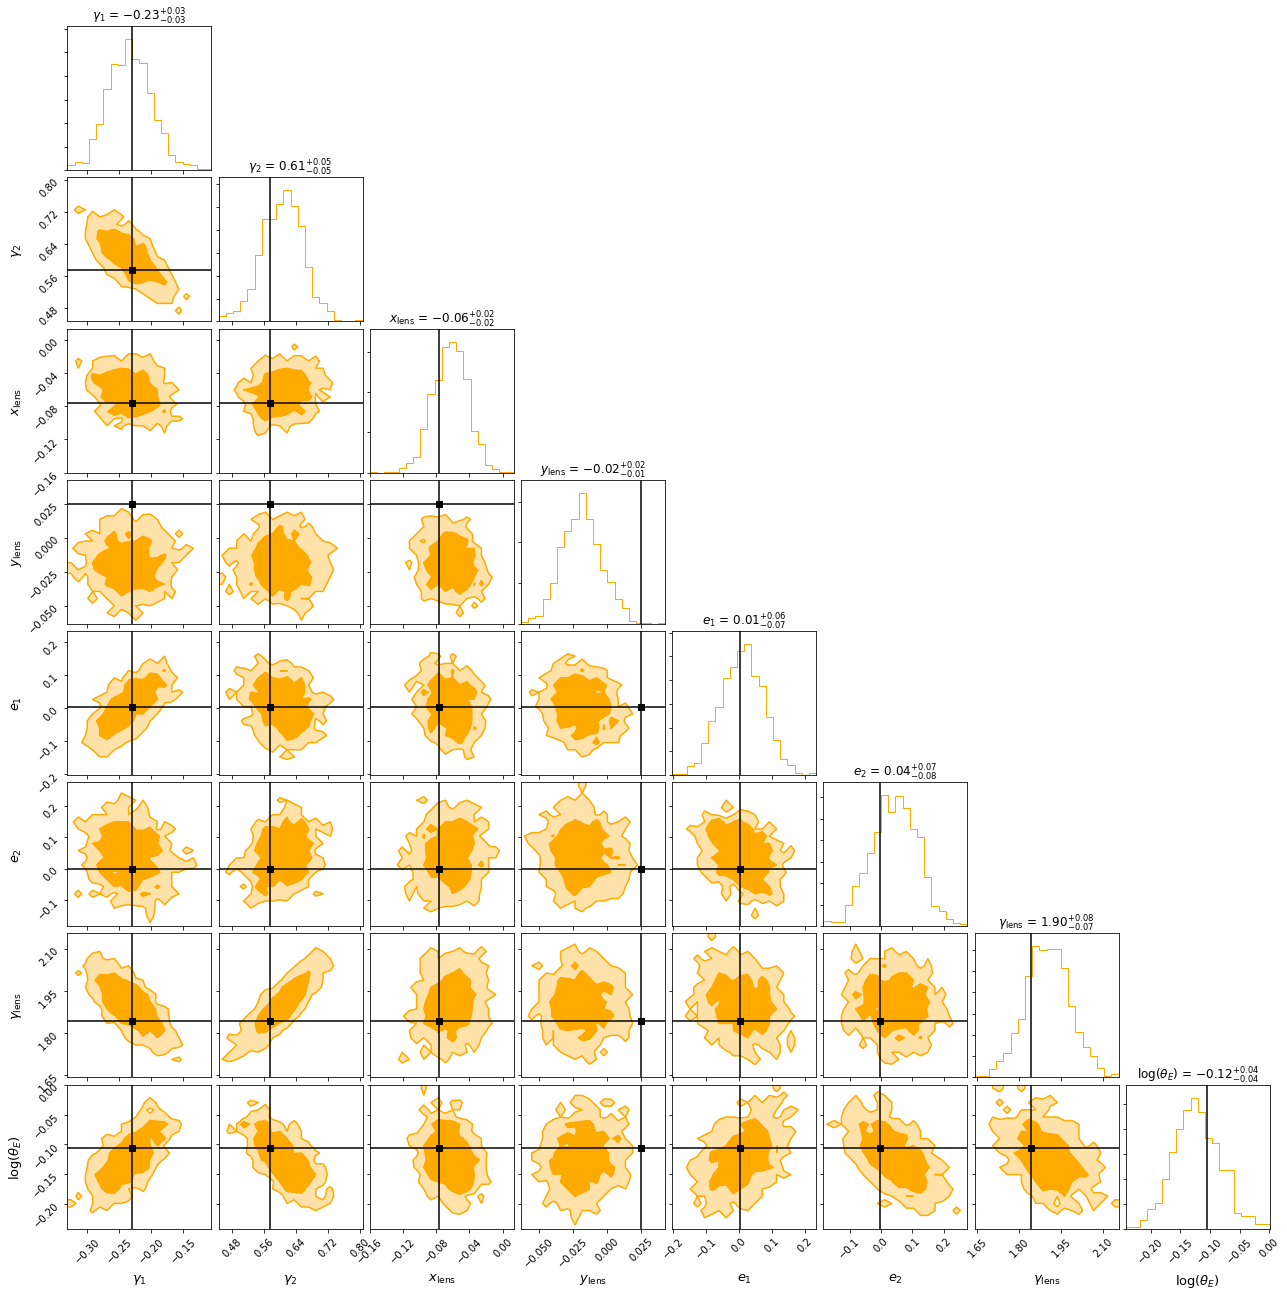

In [19]:
image_index = 21
bnn_infer.plot_posterior_contours(image_index)

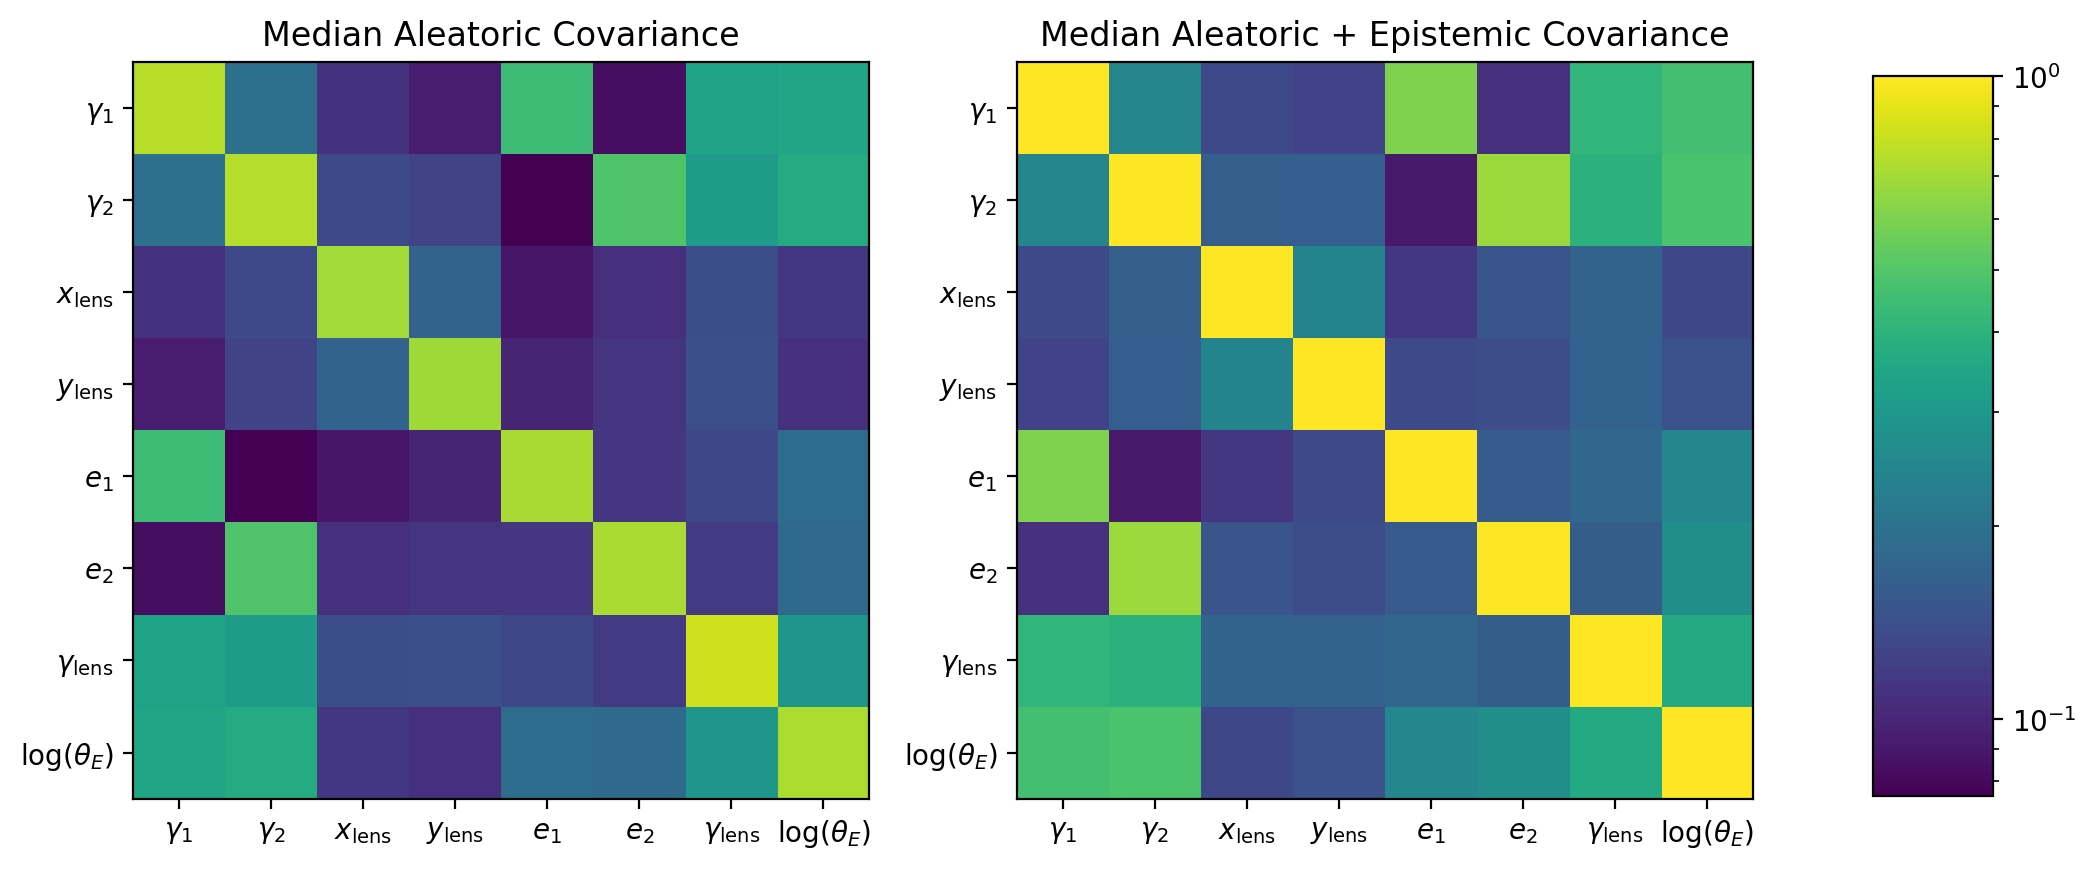

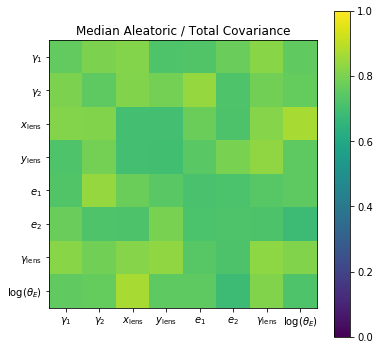

In [20]:
bnn_infer.comp_al_ep_unc()

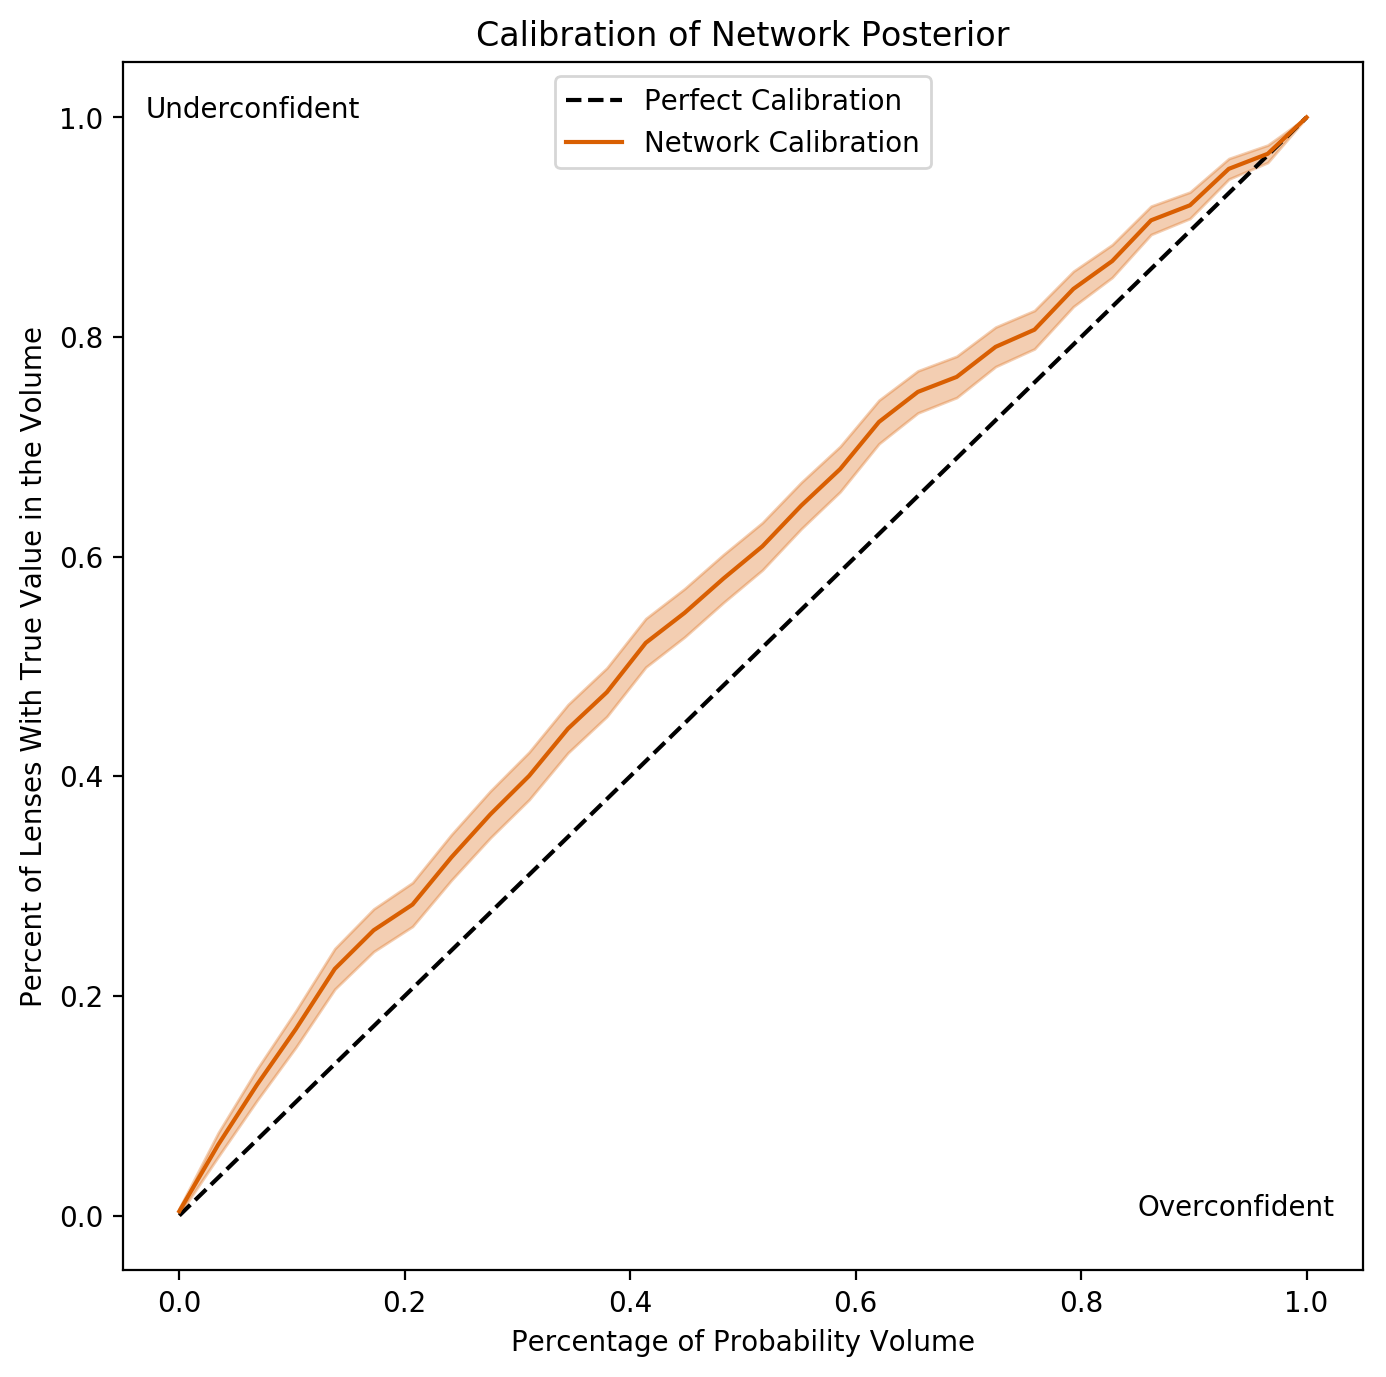

In [21]:
color_map = ['#000000','#d95f02']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Full Posterior Low Regularization

In [22]:
config_path = root_path + 'configs/nn2_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2_lr = root_path + 'validation_results/nn2_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2_lr)

Is model built: True
No weights found. Saving new weights to /home/swagnercarena/ovejero/models/nn2_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_lr_samps/


In [23]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.050746017232140214 0.008473113532108327 0.012401309272252001
external_shear_g2 0.0213688960664473 0.008022523191218312 0.01304307107525695
lens_mass_center_x 0.01389670161892742 0.004798057709300682 0.008163917455756797
lens_mass_center_y 0.016286553613281702 0.004984724251249399 0.008257656919973676
lens_mass_e1 0.03794046054781843 0.01369832489784481 0.021553855660953525
lens_mass_e2 0.03524257254057574 0.012414955221216509 0.021327847066450176
lens_mass_gamma 0.05771155874712536 0.02799879640382208 0.04485748074446837
lens_mass_theta_E_log 0.02529257943570557 0.005449824428718629 0.00817509318431485


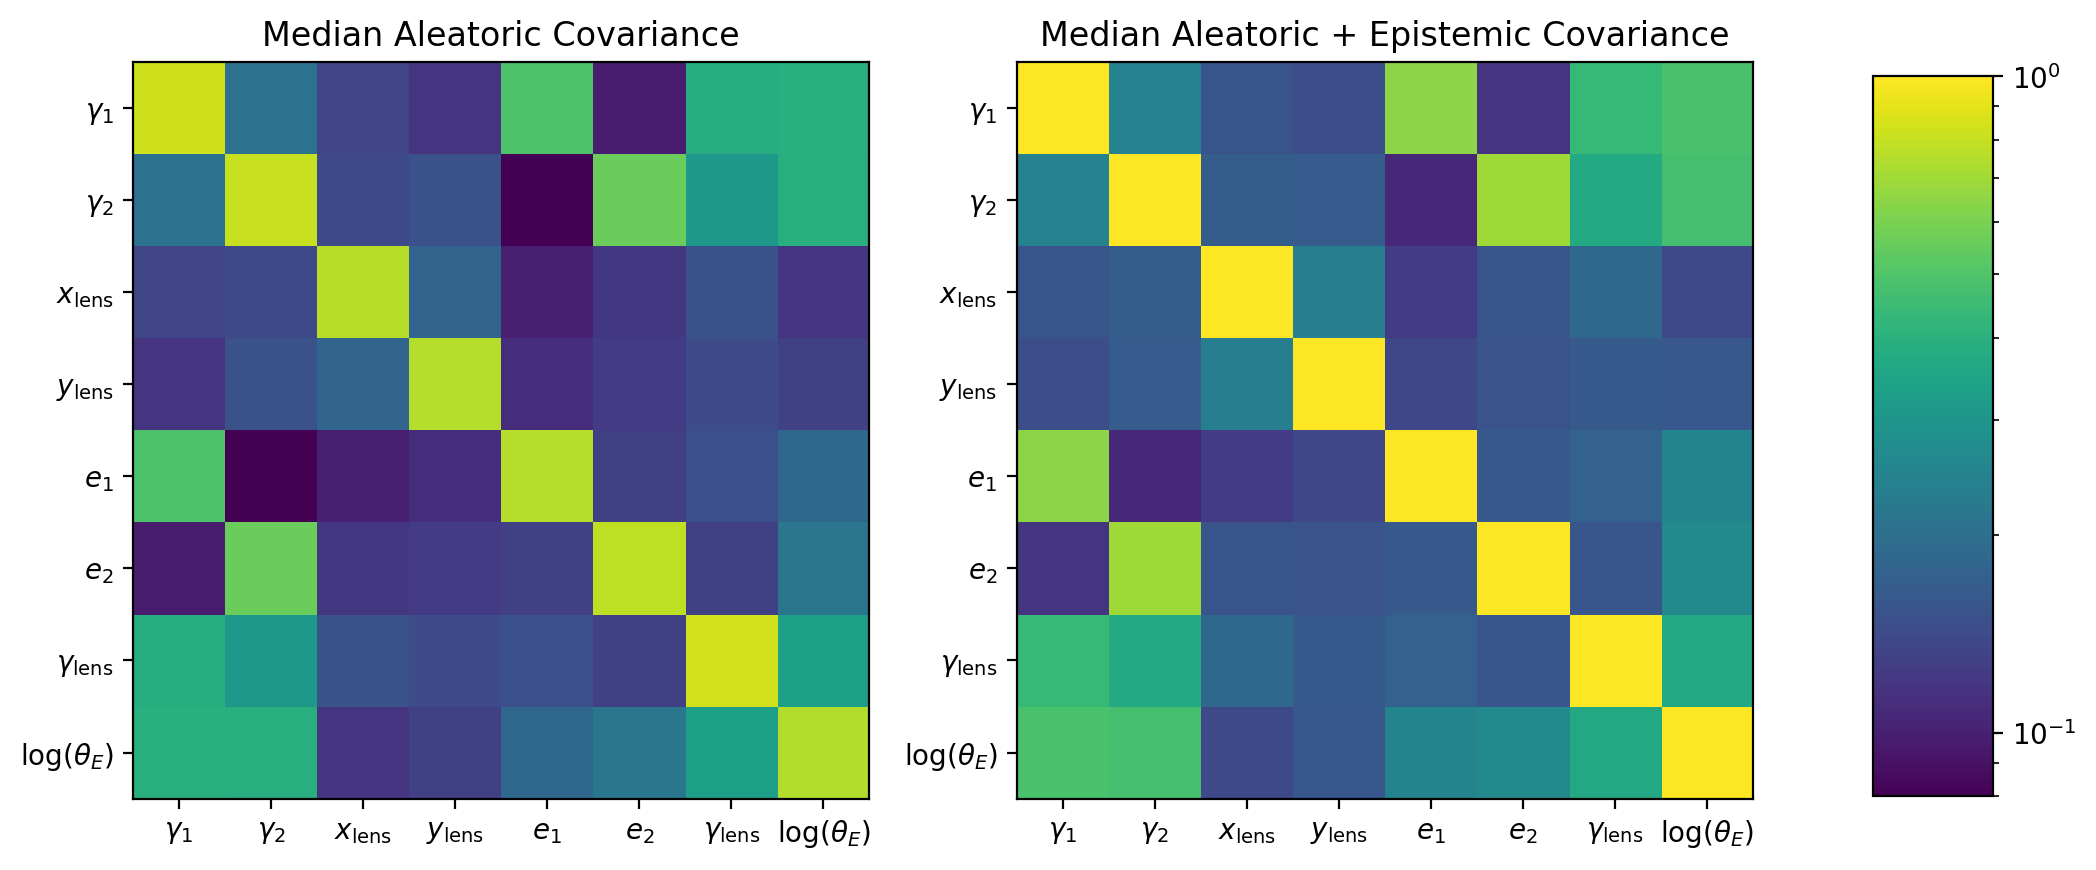

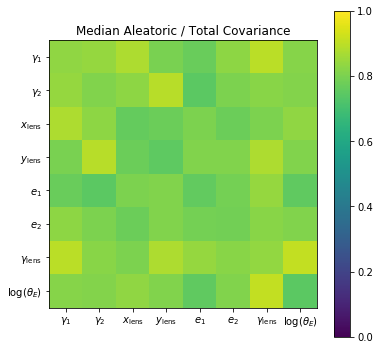

In [24]:
bnn_infer.comp_al_ep_unc()

## Full Posterior High Regularization

In [25]:
config_path = root_path + 'configs/nn2_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2_hr = root_path + 'validation_results/nn2_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2_hr)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_hr_samps/


In [26]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.03911046645985884 0.008293492340225299 0.017493063390703795
external_shear_g2 0.020600124471134695 0.008484134724875515 0.018210557971193846
lens_mass_center_x 0.012790865745681416 0.0043479670854093926 0.012370161507186752
lens_mass_center_y 0.01594217367387541 0.004641481492116667 0.012597751563268752
lens_mass_e1 0.036735672190972415 0.013705921738870946 0.0306943236804335
lens_mass_e2 0.0345444467868532 0.014633182360875976 0.03108986545536584
lens_mass_gamma 0.05727595710153674 0.031046108289062957 0.057823926741497195
lens_mass_theta_E_log 0.01979802282909869 0.004913382475508855 0.01193080498545809


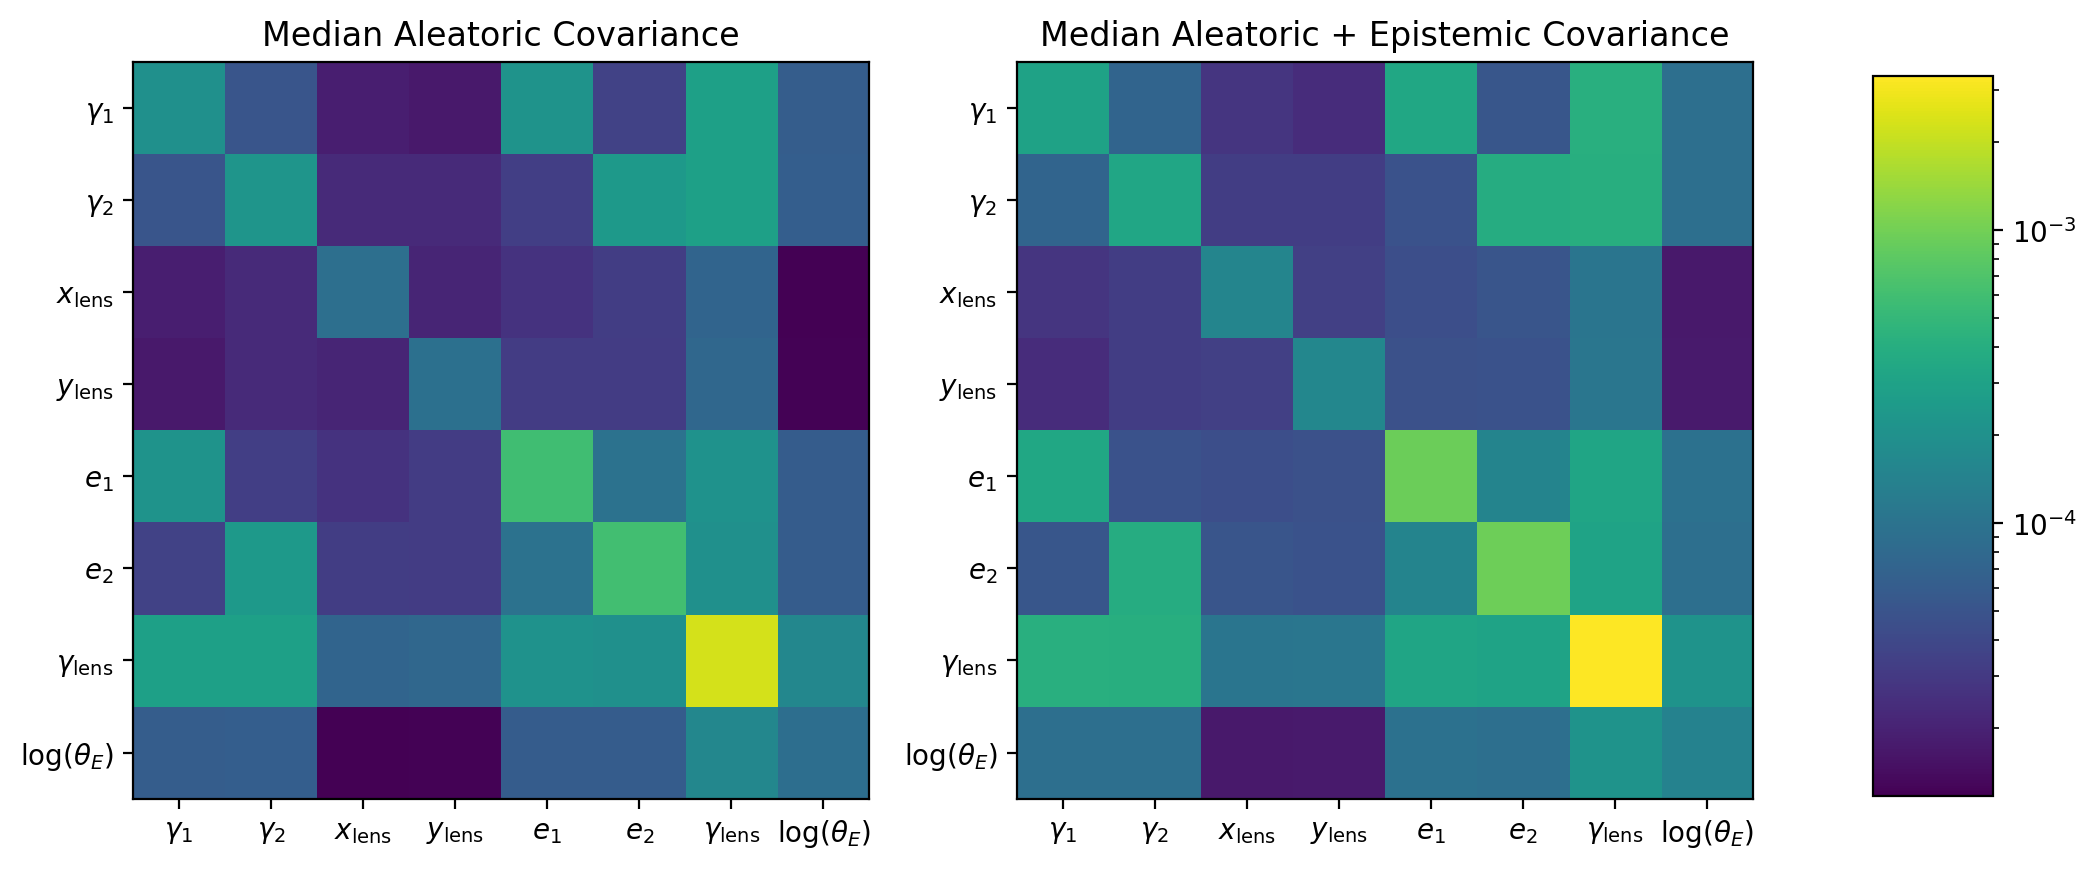

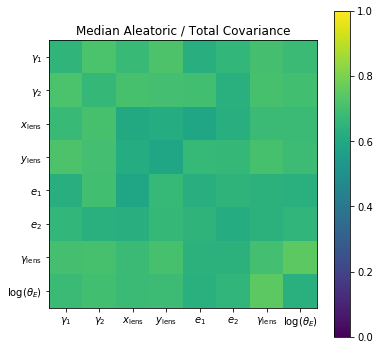

In [27]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Full Posterior No Regularization

In [28]:
config_path = root_path + 'configs/nn2_zr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn2_zr = root_path + 'validation_results/nn2_zr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn2_zr)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2_zr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_zr_samps/


In [29]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.04710997712871082 0.008034328574718929 0.00867938233702929
external_shear_g2 0.020441892243400202 0.007426560101927895 0.008560821186309218
lens_mass_center_x 0.0140006151031837 0.004972595945381485 0.004854477425621638
lens_mass_center_y 0.015734692647511987 0.0048672478465853625 0.00478200407729429
lens_mass_e1 0.03658742007122534 0.01286062340116254 0.013434057862332979
lens_mass_e2 0.03369187845802066 0.01243690100215113 0.013533114745456473
lens_mass_gamma 0.05656310780040623 0.02496216410917884 0.03264024513178416
lens_mass_theta_E_log 0.023570350272157516 0.00503829878981781 0.005490751295055968


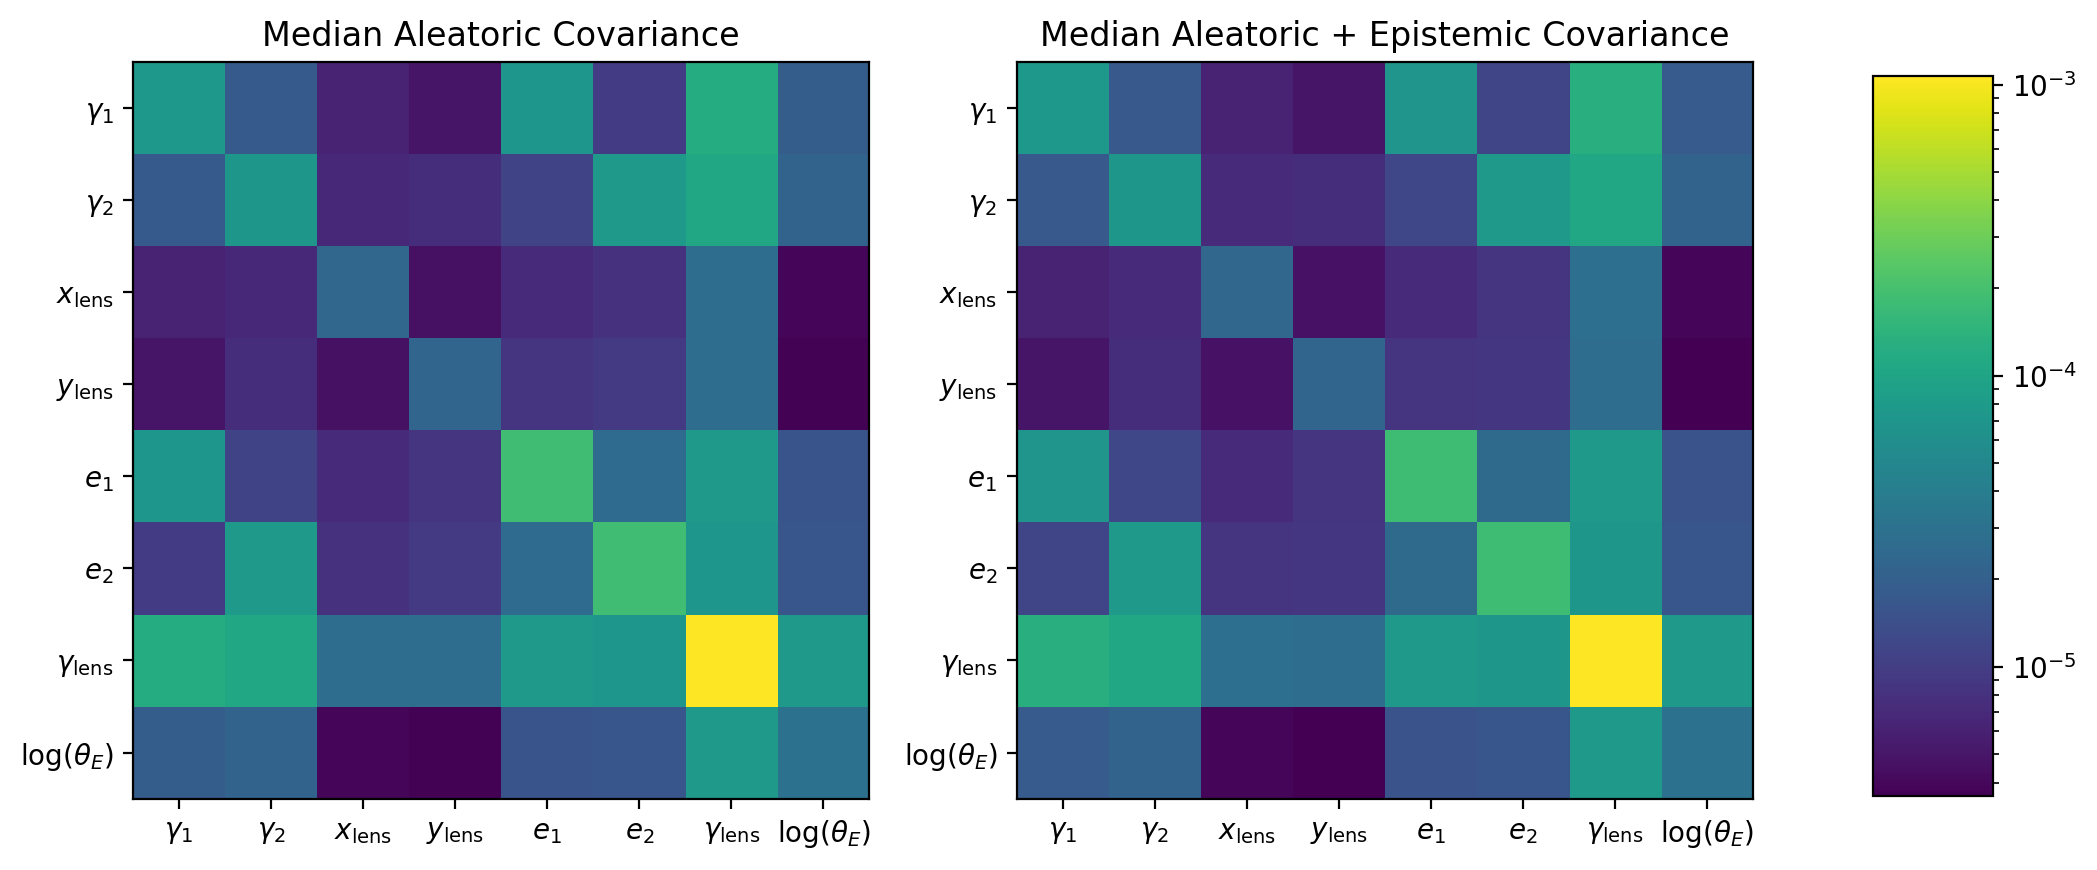

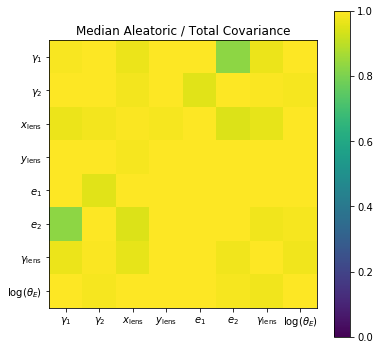

In [30]:
bnn_infer.comp_al_ep_unc(norm_diagonal=False)

## Comparison of Fulls

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2_zr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_zr_samps/
Is model built: True
No weights found. Saving new weights to /home/swagnercarena/ovejero/models/nn2_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_lr_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_hr_samps/


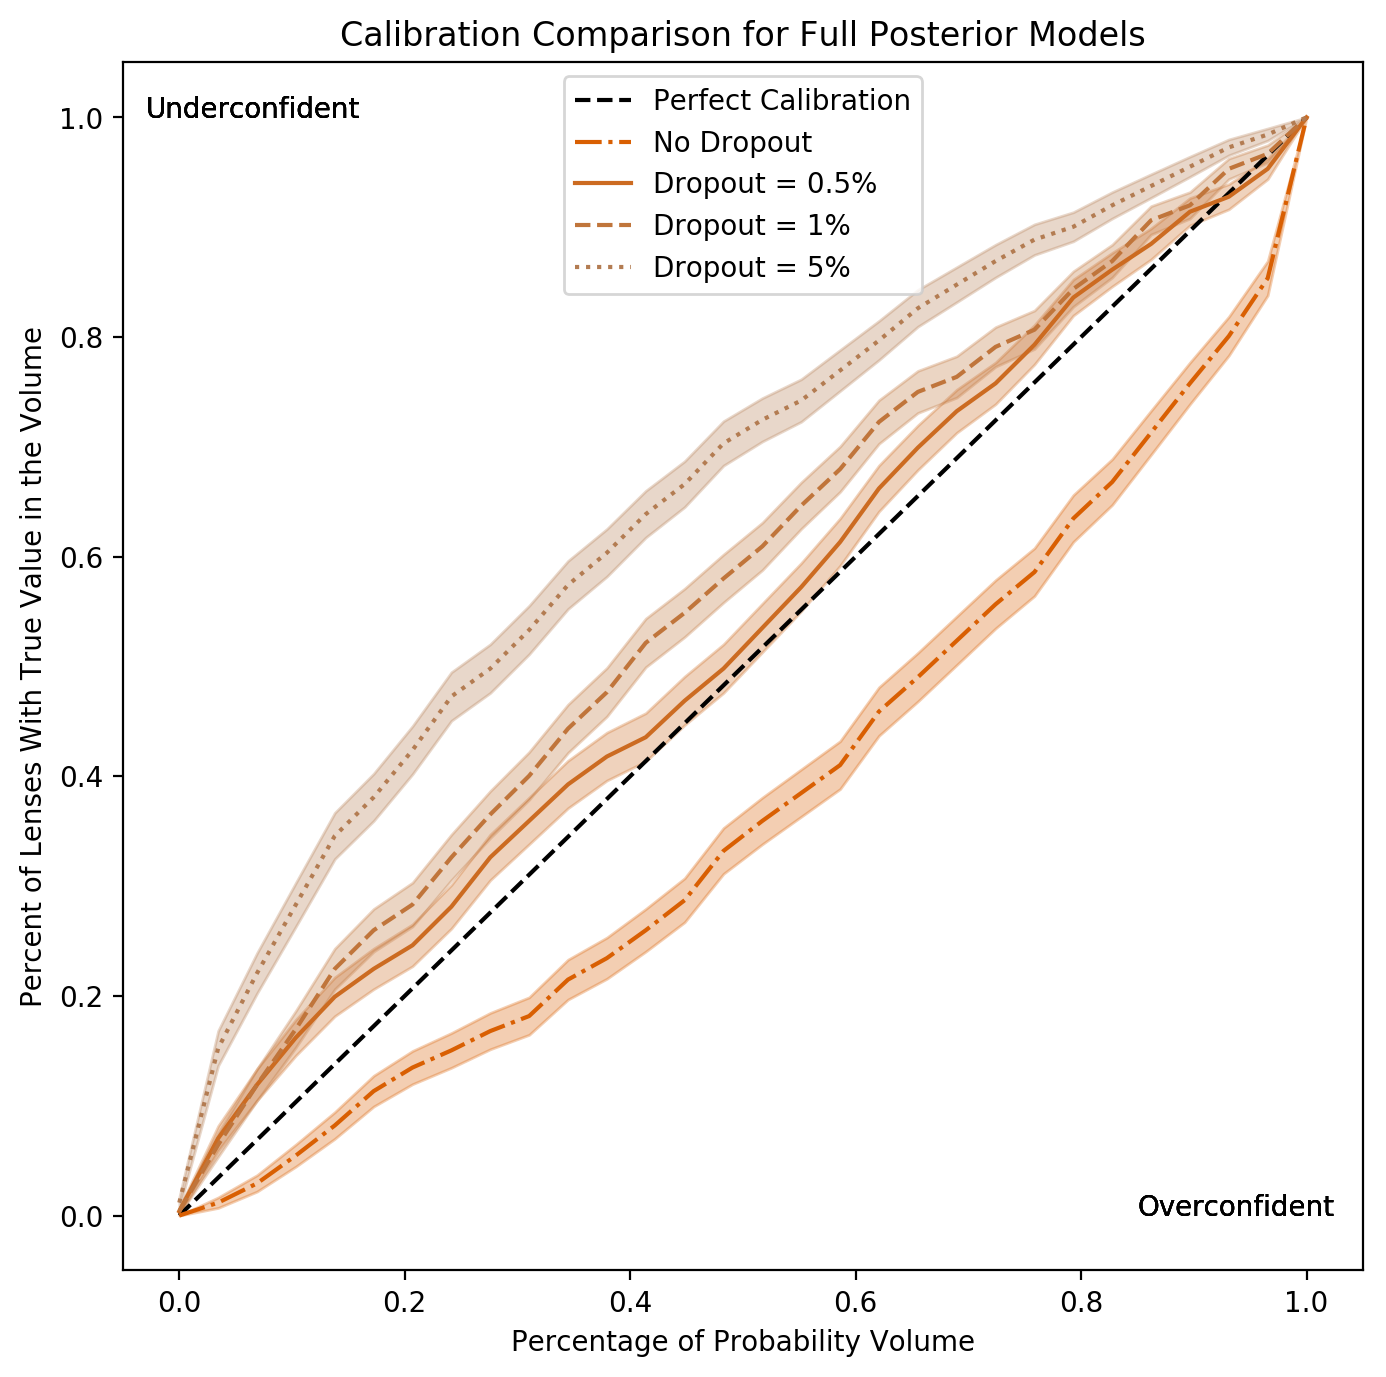

In [32]:
# color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
color_map = ['#000000','#d95f02','#cc6b21','#c0753b','#b37c52']
ls_list =['-.','-','--',':']

# NN2_ZR
config_path = root_path + 'configs/nn2_zr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_zr)
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False,
                                 ls=ls_list[0])

# NN2_LR
config_path = root_path + 'configs/nn2_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_lr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                 ls=ls_list[1])

# NN2
config_path = root_path + 'configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                ls=ls_list[2])

# NN2_HR
config_path = root_path + 'configs/nn2_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[3:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'No Dropout',r'Dropout = 0.5%',r'Dropout = 1%',
                                       r'Dropout = 5%'],
                                 title='Calibration Comparison for Full Posterior Models',ls=ls_list[3])

## GM Posterior

In [33]:
# First specify the config path
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
num_samples = 1000
save_path_nn3 = root_path + 'validation_results/nn3_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_samps/


In [35]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.04563687442696755 0.007207032939356478 0.013046722652232227
external_shear_g2 0.02056379626471917 0.007586506666675916 0.013555721840481838
lens_mass_center_x 0.012561148549012927 0.0045100314275719755 0.008704997962921684
lens_mass_center_y 0.01576667878209659 0.004938258681381612 0.008684816428387828
lens_mass_e1 0.03727507069302239 0.012538072843684217 0.022940098449206435
lens_mass_e2 0.03547416836211578 0.011703087973541915 0.022749507570945383
lens_mass_gamma 0.0564568967585472 0.027080680148165337 0.0450673409549983
lens_mass_theta_E_log 0.023521942086424056 0.004417673441987503 0.008568253962414323


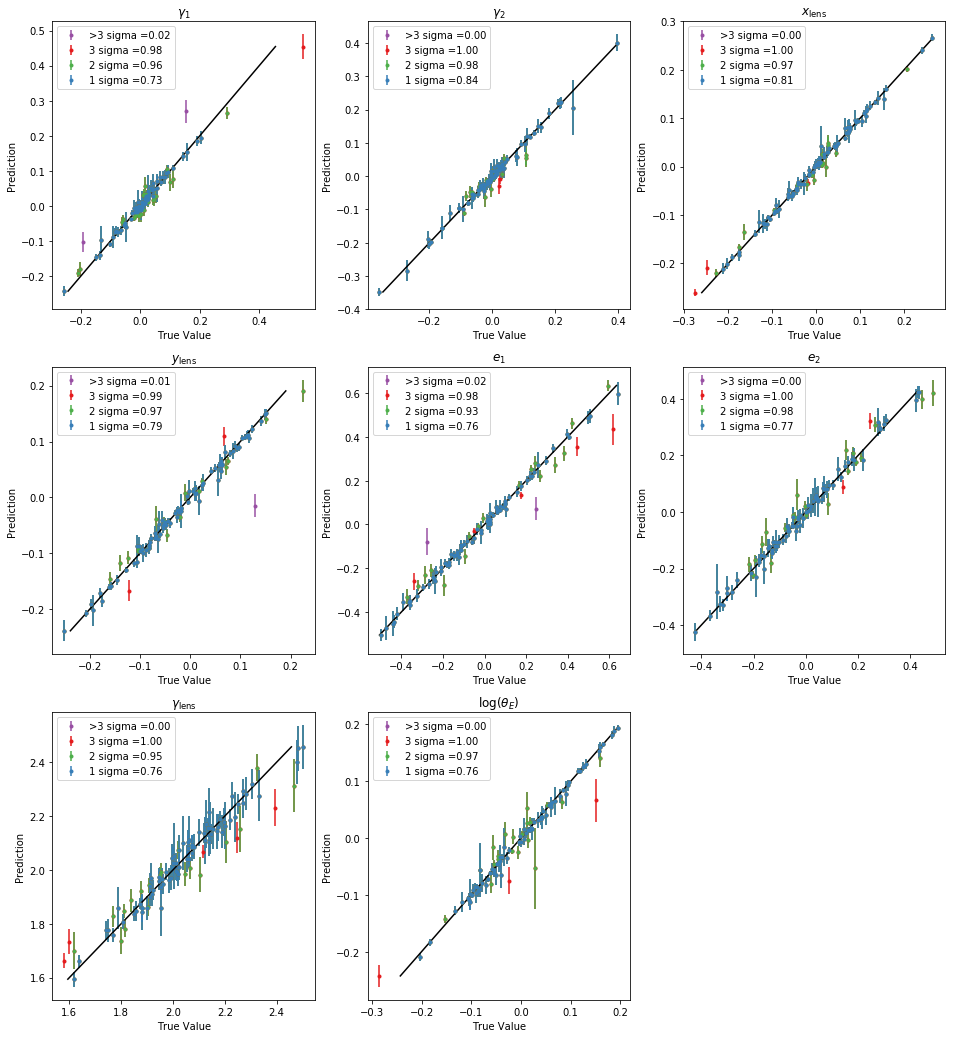

In [36]:
bnn_infer.gen_coverage_plots(num_lenses=num_lenses)

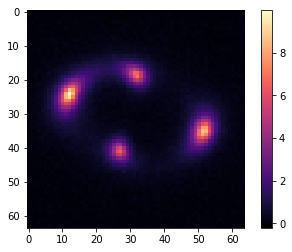

external_shear_g1 0.1911189
external_shear_g2 0.13307378
lens_mass_center_x -0.10484789
lens_mass_center_y -0.077038996
lens_mass_e1 -0.17848852
lens_mass_e2 -0.051248845
lens_mass_gamma 2.0160286
lens_mass_theta_E_log 0.18805212


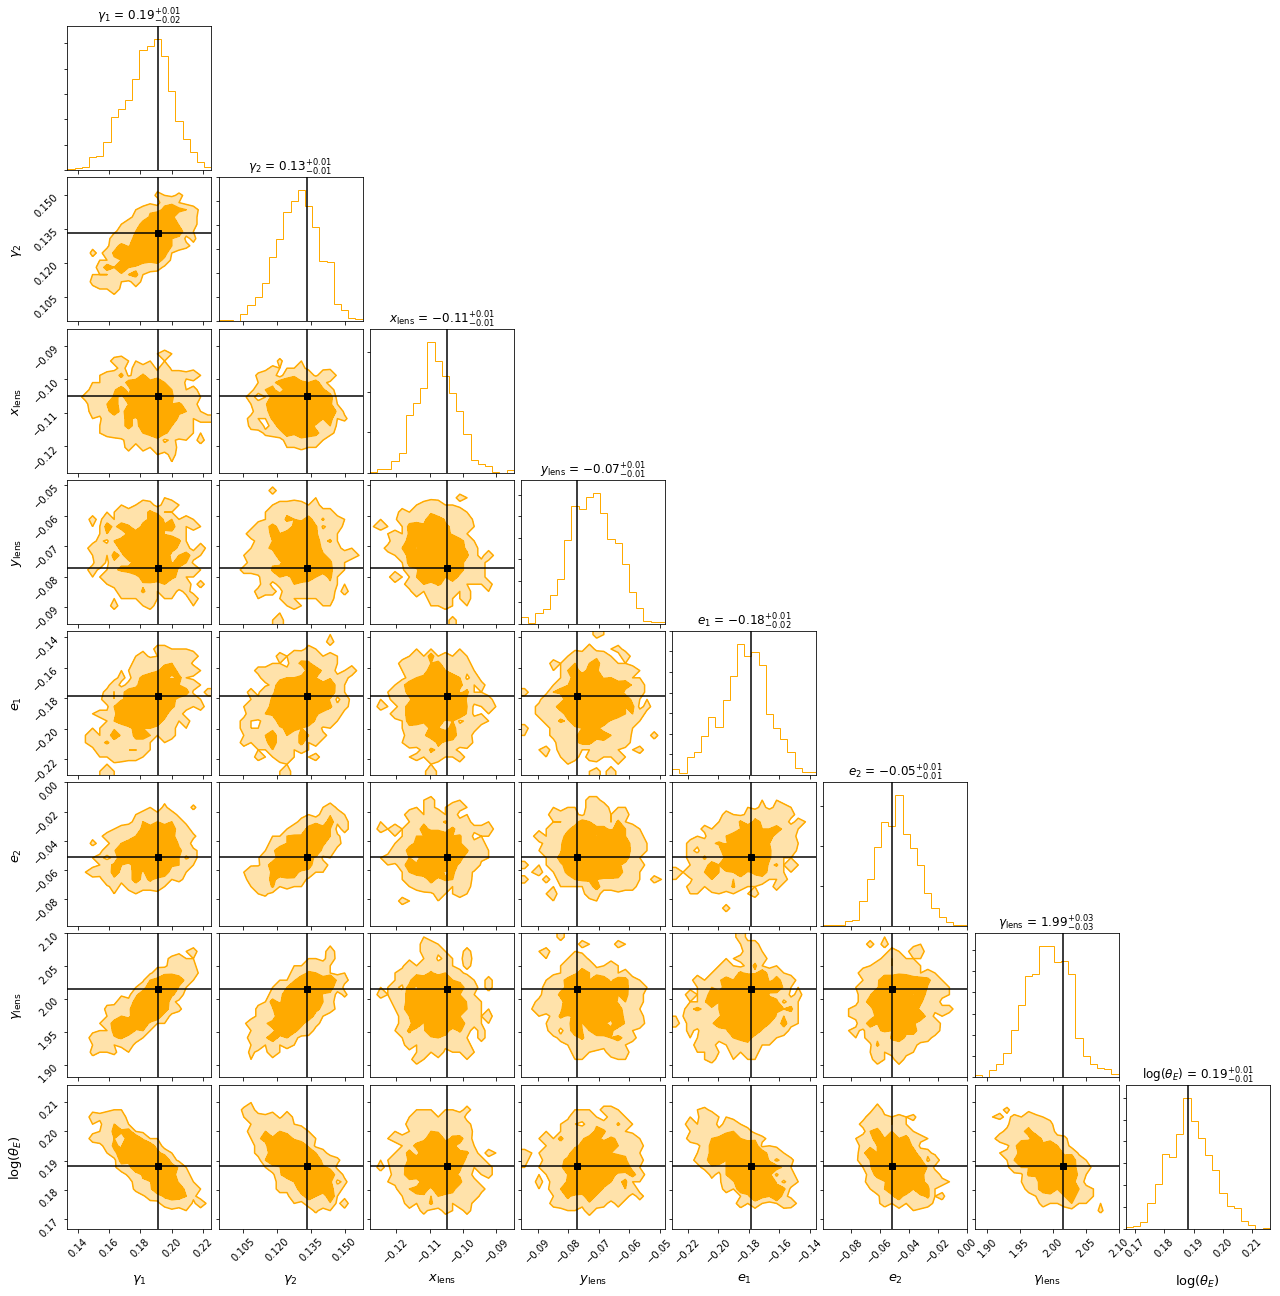

In [37]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

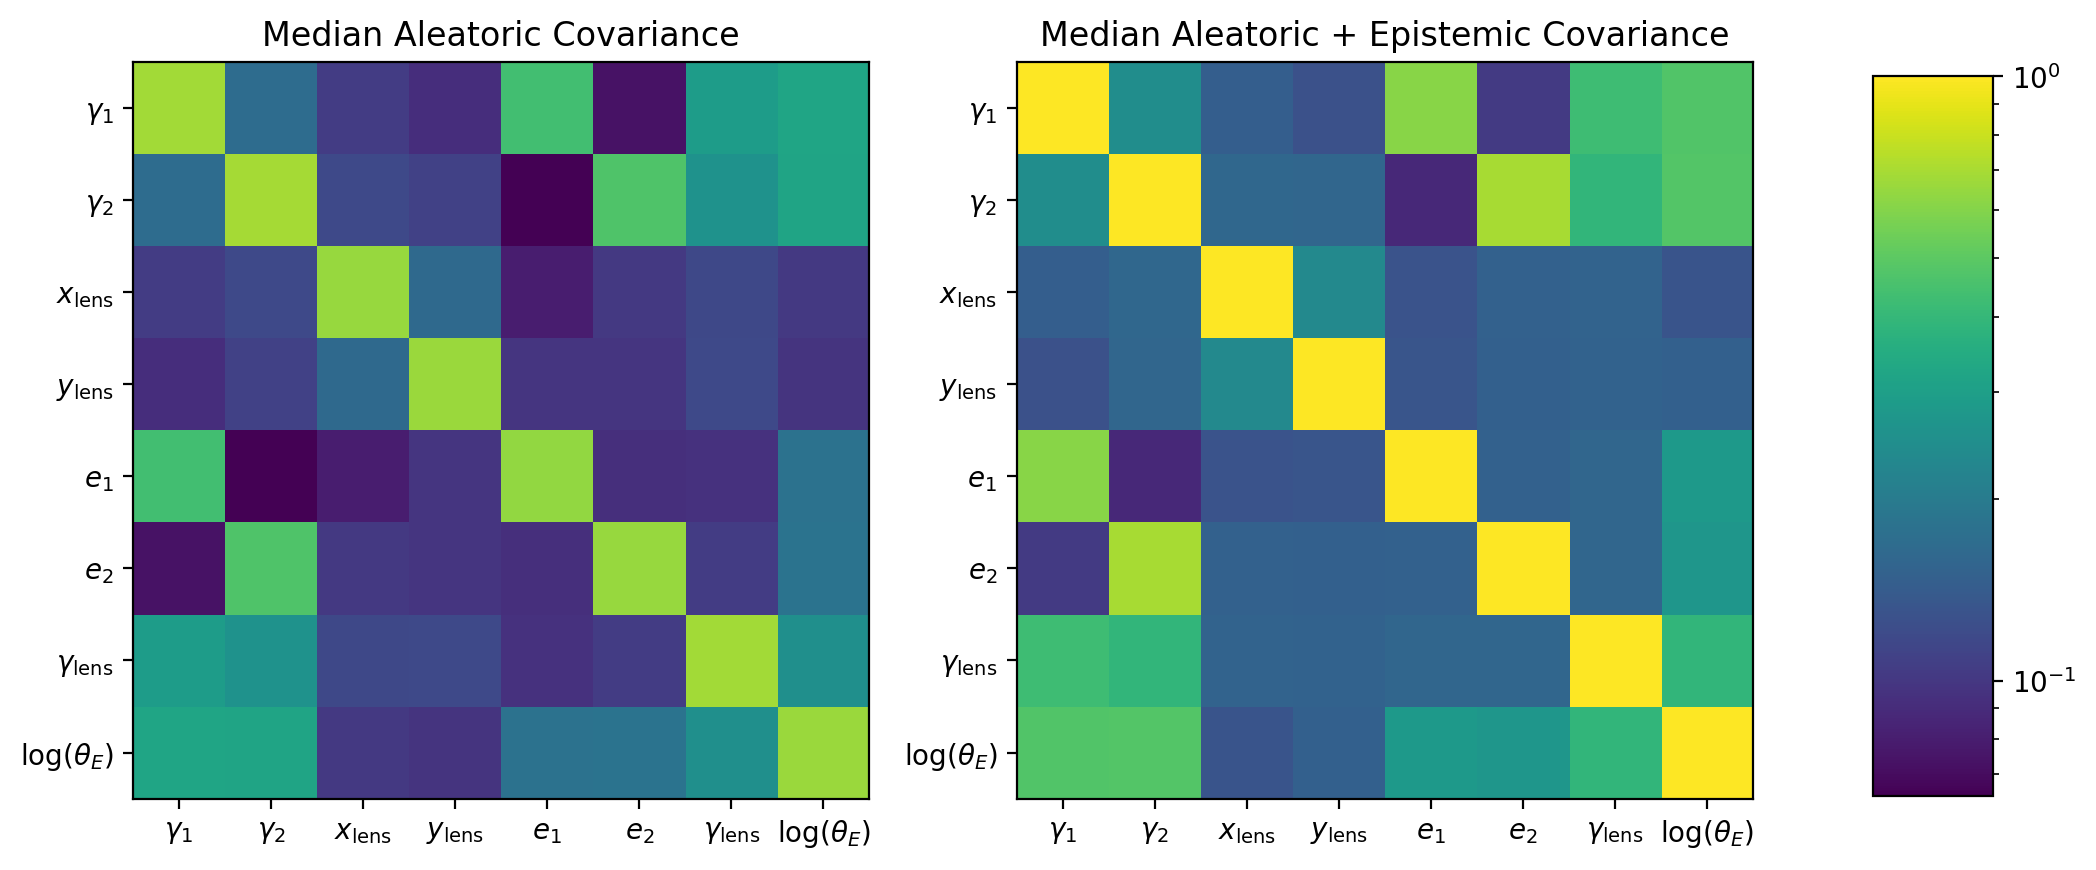

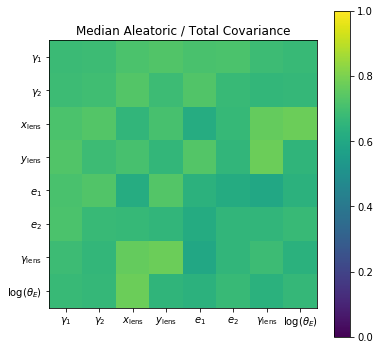

In [38]:
bnn_infer.comp_al_ep_unc()

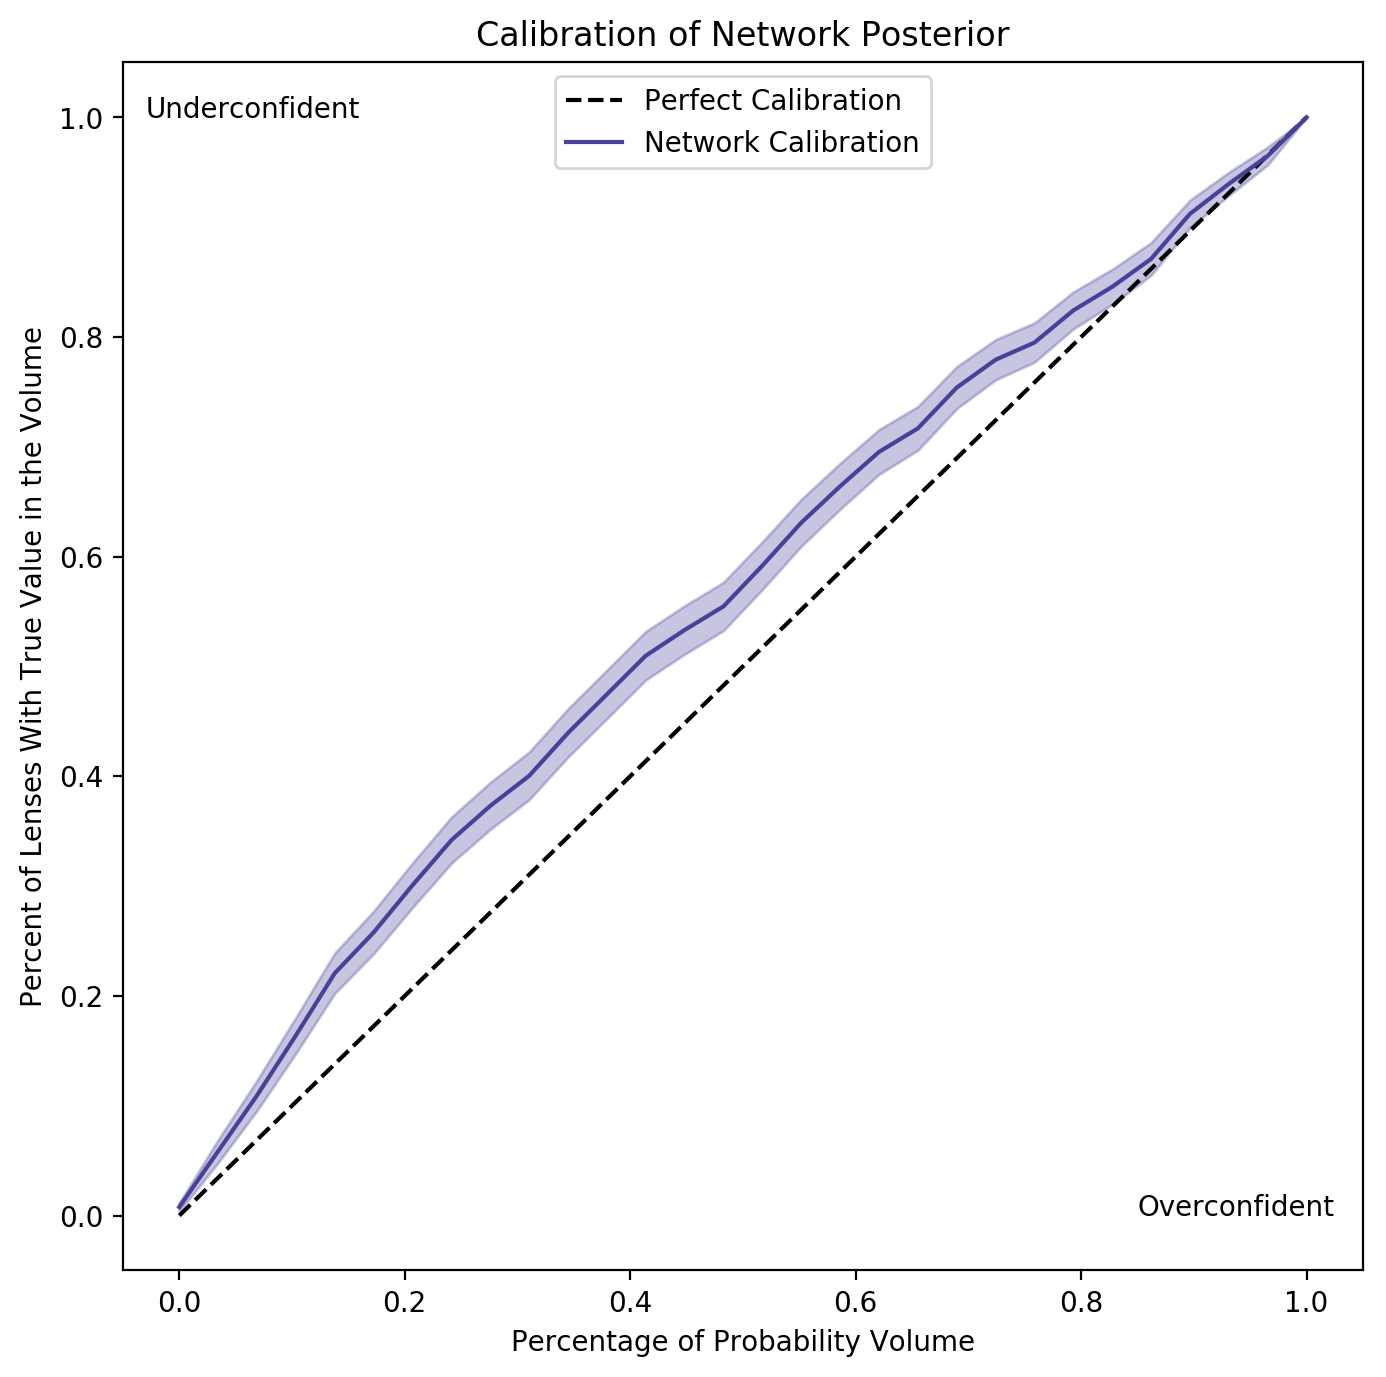

In [39]:
color_map = ['#000000','#474199']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## GMM High Regularization

In [40]:
config_path = root_path + 'configs/nn3_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn3_hr = root_path + 'validation_results/nn3_hr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3_hr)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_hr_samps/


In [41]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.036718782154356665 0.008686279513066216 0.01711130962166043
external_shear_g2 0.020979927424985344 0.008421976872685512 0.01779181862100044
lens_mass_center_x 0.014403378656943485 0.004797035177916721 0.01199338292436704
lens_mass_center_y 0.0164607454386314 0.004833064411523936 0.012161301465896166
lens_mass_e1 0.036633357325564546 0.013193089923263263 0.02992626635131225
lens_mass_e2 0.034436370505438296 0.012266127981123743 0.030132198601859728
lens_mass_gamma 0.058911137903439305 0.0294868154063459 0.05774554942858423
lens_mass_theta_E_log 0.021649550110811617 0.004995141502381704 0.011581266557191106


## GMM Low Regularization

In [42]:
config_path = root_path + 'configs/nn3_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn3_lr = root_path + 'validation_results/nn3_lr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3_lr)

Is model built: True
No weights found. Saving new weights to /home/swagnercarena/ovejero/models/nn3_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_lr_samps/


In [43]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.04738046447880555 0.008064778749567791 0.012196790886432558
external_shear_g2 0.02120399326795722 0.007183430949362913 0.012459719124074582
lens_mass_center_x 0.013579517640957372 0.004806613929613748 0.007809652689326124
lens_mass_center_y 0.017045794269486415 0.004964296928308649 0.007642488379384858
lens_mass_e1 0.037689007005109576 0.01276406104940208 0.02052980119090798
lens_mass_e2 0.035862366968067494 0.01331053629685161 0.020128128462830693
lens_mass_gamma 0.054420359065454525 0.02510912998905057 0.04316418777593116
lens_mass_theta_E_log 0.025155797960374166 0.0049651738849372795 0.007899483767808316


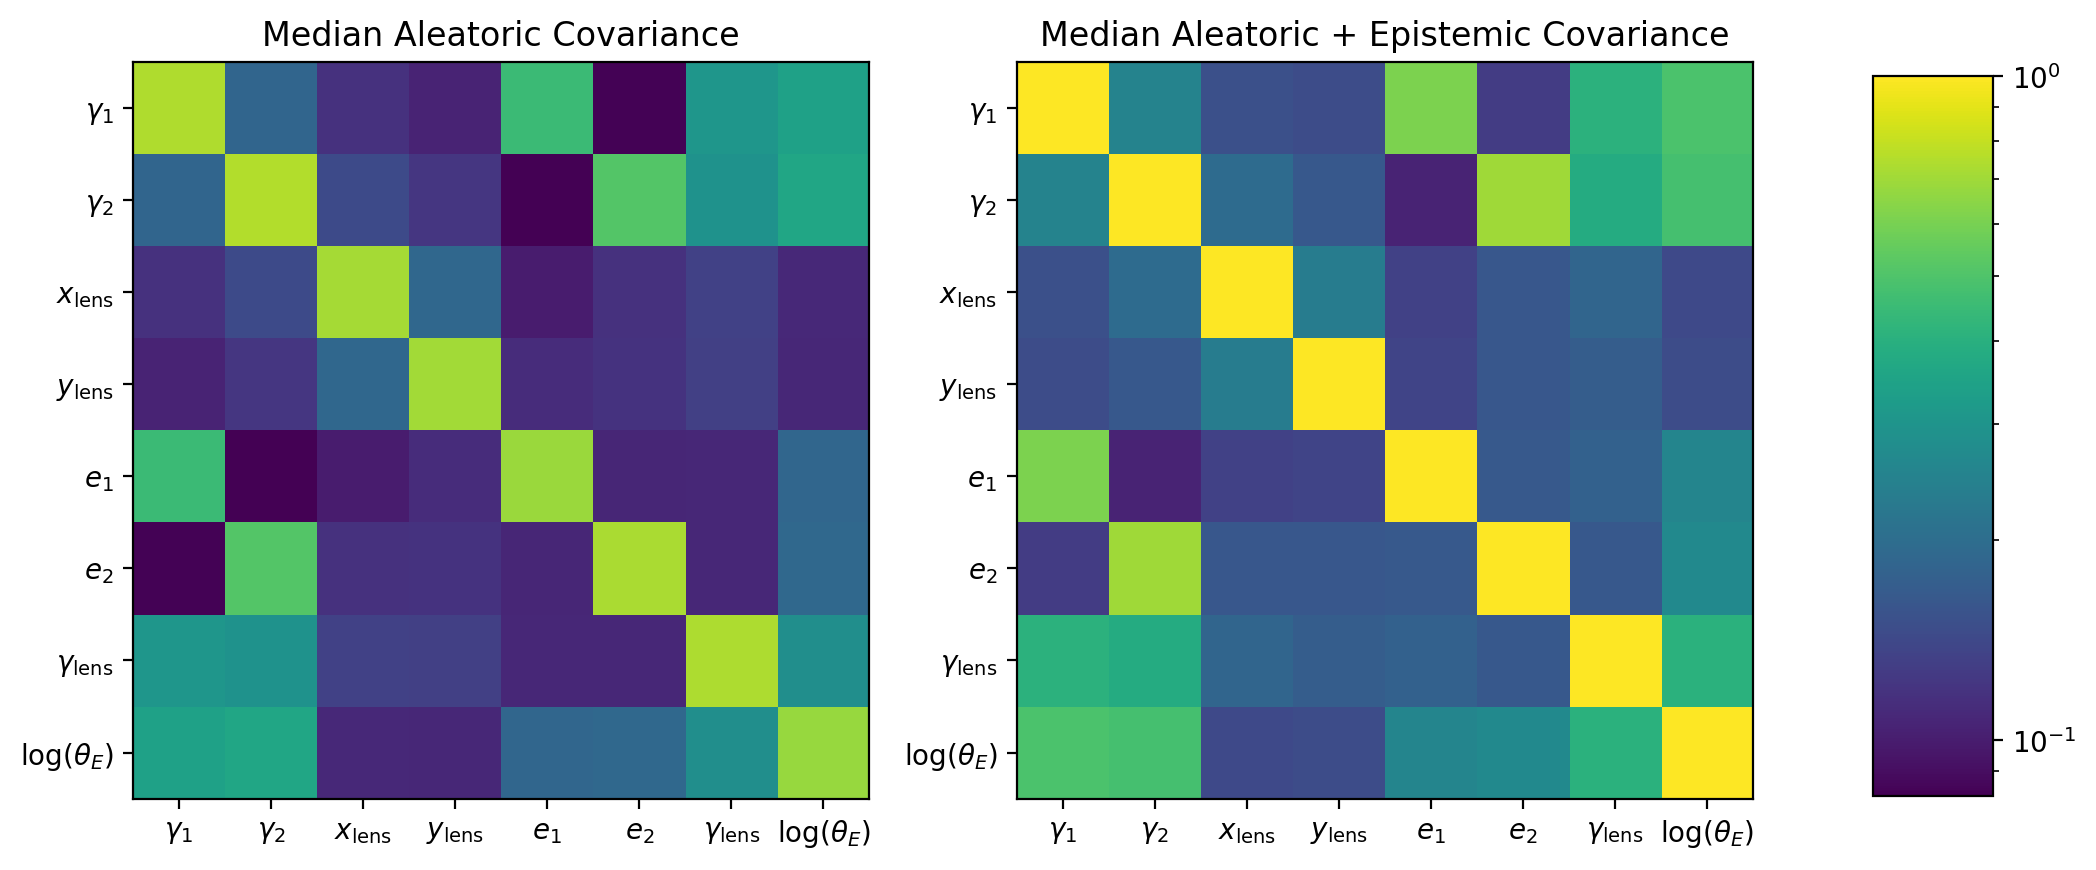

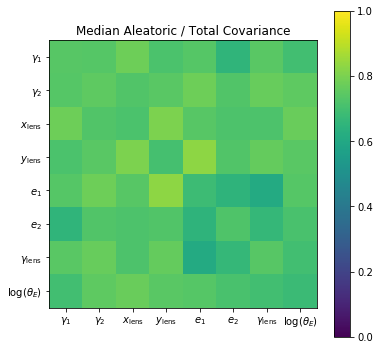

In [44]:
bnn_infer.comp_al_ep_unc()

## GMM No Regularization

In [45]:
config_path = root_path + 'configs/nn3_zr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path_nn3_zr = root_path + 'validation_results/nn3_zr_samps/'
bnn_infer.gen_samples(num_samples,save_path_nn3_zr)

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3_zr.h5


  0%|          | 0/1000 [00:00<?, ?it/s]

No samples found. Saving samples to /home/swagnercarena/ovejero/validation_results/nn3_zr_samps/


100%|██████████| 1000/1000 [01:19<00:00, 12.53it/s]


In [46]:
bnn_infer.report_stats()

Parameter, RMSE, Median Abs Error, Median Std
external_shear_g1 0.04603247709311245 0.008083884347380787 0.008396574518262125
external_shear_g2 0.020860955648771905 0.00782135696595 0.00864985893134744
lens_mass_center_x 0.014607106658934905 0.004540398811967938 0.004911009693495406
lens_mass_center_y 0.016352942496421483 0.004834081663926871 0.004679044658589898
lens_mass_e1 0.035280282391215396 0.014478976908310435 0.013136972201972383
lens_mass_e2 0.03254693034564721 0.013382660985972683 0.013816123693186706
lens_mass_gamma 0.05962237916508861 0.02682457576918451 0.03202137057217426
lens_mass_theta_E_log 0.023250706739119827 0.00524717499681171 0.005362338339602812


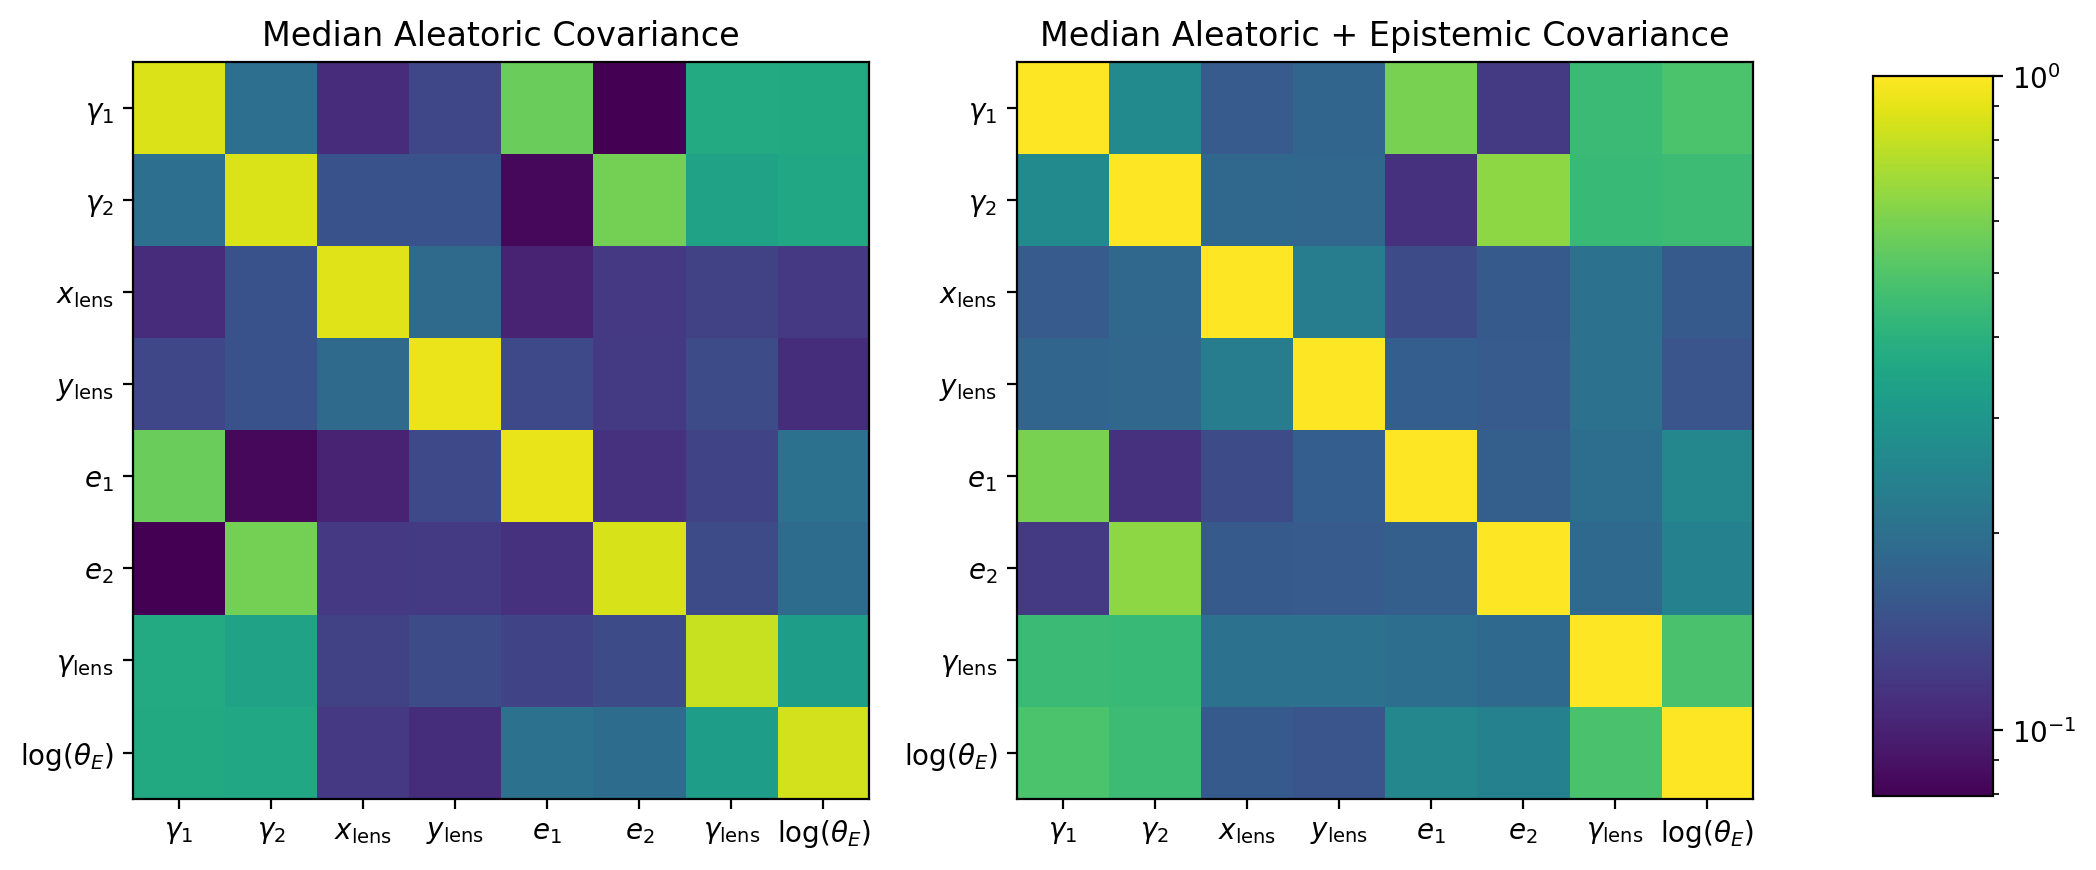

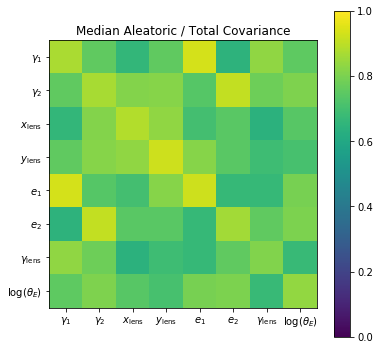

In [47]:
bnn_infer.comp_al_ep_unc()

## GMM Comparison

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3_zr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_zr_samps/
Is model built: True
No weights found. Saving new weights to /home/swagnercarena/ovejero/models/nn3_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_lr_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_hr_samps/


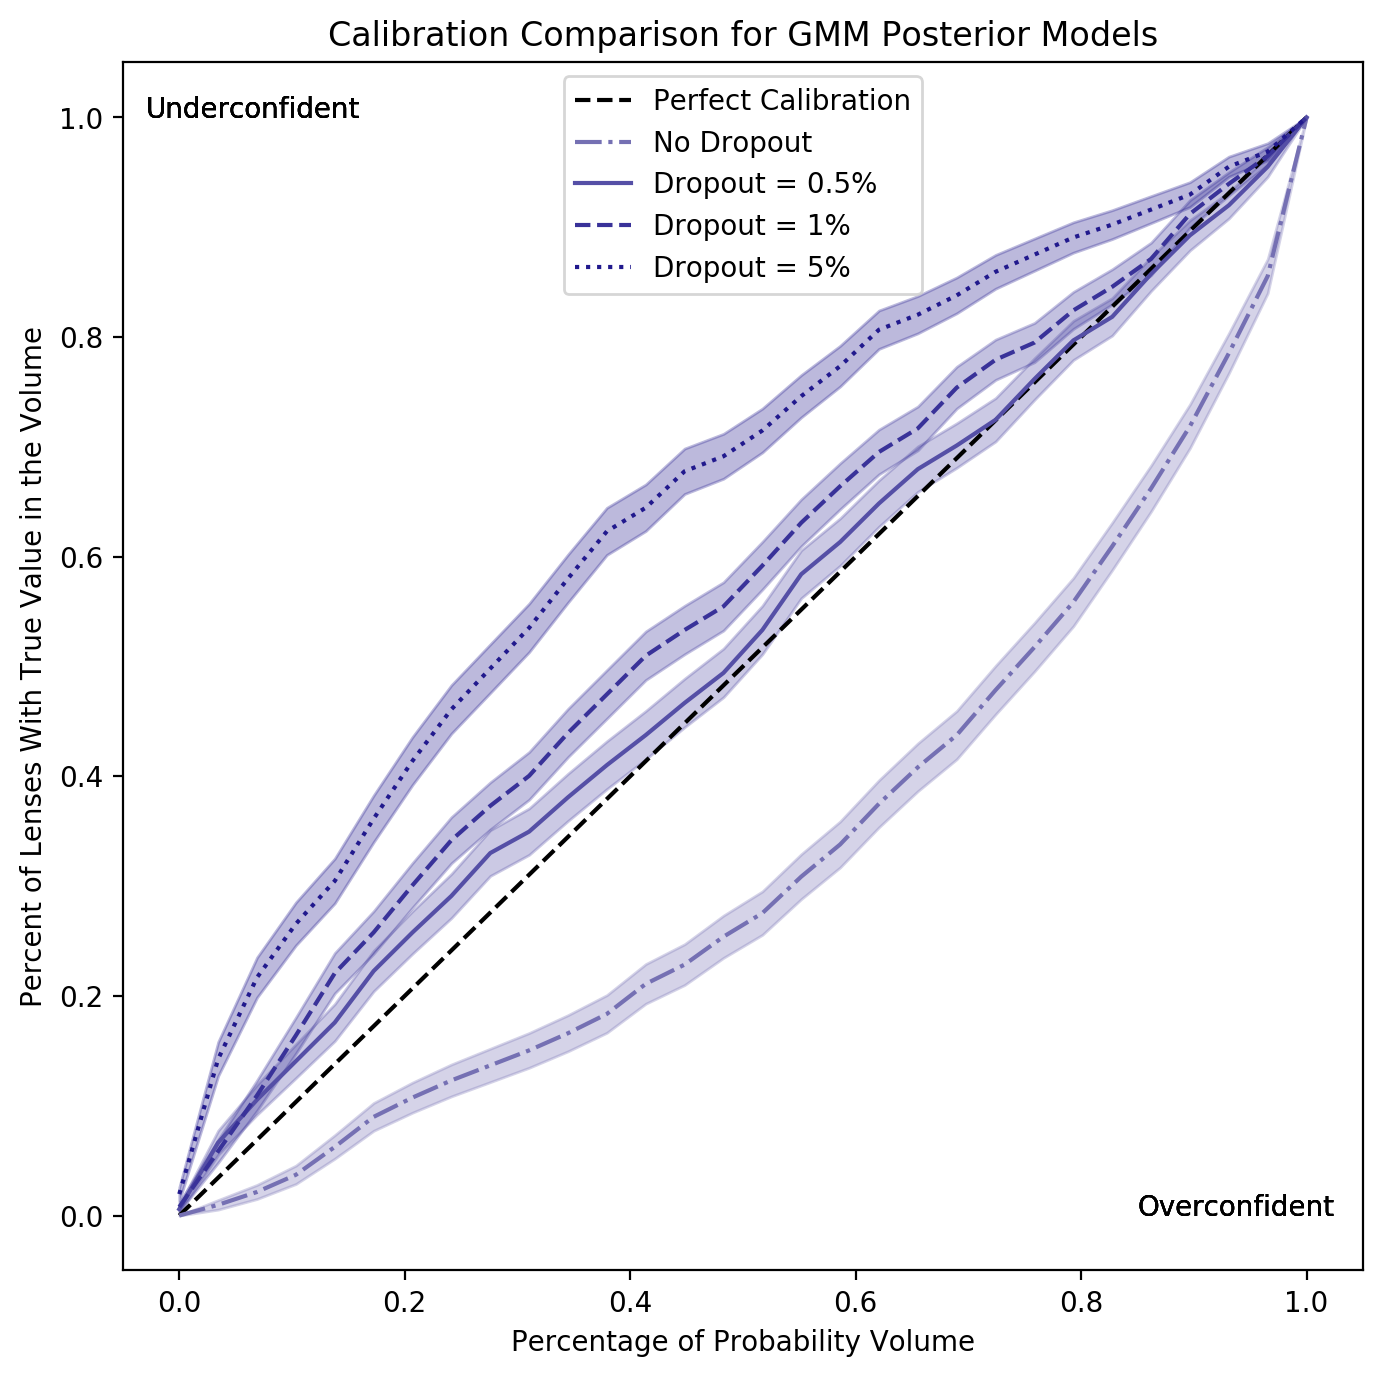

In [50]:
# color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
color_map = ['#000000','#7570b3','#554fa6','#393299','#21198d']
ls_list =['-.','-','--',':']

# NN3_ZR
config_path = root_path + 'configs/nn3_zr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_zr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False,ls=ls_list[0])

# NN3_LR
config_path = root_path + 'configs/nn3_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_lr)
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                 ls=ls_list[1])

# NN3
config_path = root_path + 'configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=False,
                                ls=ls_list[2])

# NN3_HR
config_path = root_path + 'configs/nn3_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_hr)
fig = bnn_infer.plot_calibration(color_map=color_map[3:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'No Dropout',r'Dropout = 0.5%',r'Dropout = 1%',
                                       r'Dropout = 5%'],
                                 title='Calibration Comparison for GMM Posterior Models',ls=ls_list[3])

## Combined Plot

In [ ]:
# First specify the config path
config_path = root_path + 'configs/nn1_hr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
num_samples = 1000
bnn_infer.gen_samples(num_samples,save_path_nn1_hr)

color_map = ['#000000','#1b9e77','#d95f02','#7570b3','#e7298a']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = root_path + 'configs/nn2_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn2_lr)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = root_path + 'configs/nn3_lr.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
bnn_infer.gen_samples(num_samples,save_path_nn3_lr)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration',r'Diagonal Calibration (30%)',r'Full Calibration (0.5%)',
                                       r'GMM Calibration (0.5%)'])

Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn1_hr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn1_hr_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn2_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn2_lr_samps/
Is model built: True
Loaded weights /home/swagnercarena/ovejero/models/nn3_lr.h5
Loading samples from /home/swagnercarena/ovejero/validation_results/nn3_lr_samps/
